# IV - dIdV Sweep Analysis Demo with Single Channel

(see <b>ivsweep_analysis_adv.ipynb</b> for multiple channels)

The analysis of IV/dIdV sweep data is done in 2 steps:
1. <font color="blue"><b>Processing of the data</b> </font> which includes cutting pile-ups using "autocut", calculating offset, noise PSD (if IV/noise data available). 
  * Users can choose to process specific channels and to enable processing of IV/noise and/or dIdV data. 
  * By default, all available data for all channels are processed. 
  * Best is to process using <b>detprocess/scripts/process.py </b> rather than processing in a Jupyter notebook (see processing section). <br><br>
  
2. <font color="blue"><b>IV and/or dIdV analysis</b></font>: Analyze IV data to calculate TES resistance and bias power, fit dIdV if dIdV data available. This is done in a Jupyter notebook.  Multiple channels can be analyzed in the same time. 



We use data taken at UC Berkeley  using Spice/Herald <b>Melange 1% </b> devices. Data are only stored locally. Change path to run notebook

In [1]:
import qetpy as qp
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import pickle

# detprocess
from detprocess import IVSweepAnalysis, IVSweepProcessing

## 1. IV Sweep processing


This step can be either done in a Jupyter Notebook or command line:

 * <font color="blue"><b>Jupyter Notebook:</b></font>
   * Instantiate IVSweepProcessing with data path
   * Call process" function. Default: all channels available processed, both IV and dIdV if available. Use arguments to disable either IV or dIdV or select specific channels. 
   
 * <font color="blue"><b>Command line </b></font> using <i><b>scripts/process.py</b></i> (<font color="red"><b>preferred</b></font>)
   * example: <i> python3 scripts/process.py --enable-ivsweep --raw_path /sdata1/runs/run28/raw/iv_didv_I2_D20230615_T231959 --ncores 16</i>

#### Example processing using Jupyter Notebook directly

Let's save data in default location (same base directory as raw data + /processed/[group_name]/sweep_analysis_DYYYYMMDD_HHMMSS.hdf5). <br>
A different base path can be provided using "save_path" argument

In [2]:
channel_name = 'Melange1pc1ch'
base_path = '/sdata2/runs/run28'

#### Data processing

For this demo, the processing was done with the command line:

<i> python3 scripts/process.py --enable-ivsweep --raw_path /sdata2/runs/run28/raw/iv_didv_I2_D20230615_T231959 --ncores 16</i>

In [3]:
# If jupyter notebook used for processing then do the following

# Melange 1%
melange1pc_ivsweep_path = base_path + '/raw/iv_didv_I2_D20230615_T231959'
myproc = IVSweepProcessing(melange1pc_ivsweep_path)

#df = myproc.process(channels=channel_name, ncores=16, lgc_save=True)

INFO: Checking sweep data. Be patient!

IV/dIdV sweep available data:
 
Melange1pc1ch:
 -IV: 28 bias points
 -dIdV: 28 bias points
 -Common IV-dIdV: 28 bias points


## 2. IV/dIdV Sweep Analysis

For the moment, the analysis needs to be done in a Jupyter Notebook. There are several steps:

Instantiate <b>IVSweepAnalysis</b>, then
1. <font color='red'><b>Set proceesed data:</b></font>
  * using file name (<i>set_data_from_file()</i> function), can be called mutliple times if multiple channels
  * or using dataframe directly (<i>set_data_from_dataframe()</i> function), can be called mutliple times if multiple channels
  * or using a dictionary with keys=channels and values=dataframes (<i>set_data_from_dataframe()</i> function)<br><br>
  
2. <font color='red'><b>Check data</b></font> Before analyzing the IV sweep data, it is best to have a look
  * Use <i>describe()</i> function to check what is available (channels, IV and/or dIdV points)
  * Plot raw offset in function of bias using "<i>plot_ivsweep_offset(channel)</i> function
  * During the proc
 
  
3. <font color='red'><b>Analyze IV sweep  to calculate I0, R0, P0 </b></font> (from IV and/or dIdV data) using "<i>analyze_sweep()"</i> function. <br><br>
    
4. <font color='red'><b>Analysze dIdV data</b></font>: Fit dIdV, calculate small signal parameters and uncertainties
   *  <b>Plot dIdV summary for a specific channel:</b> Make summary plots such as chi2, Loop gain, etc. using "<i>plot_didv_summary()</i>" function <br><br>
   
   
5. <font color='red'><b>Calculate energy resolution for each bias points</b></font> using <i>calc_energy_resolution()</i> function
   * Template is automatically calculate from small signal paramaters
   * Additionally, a template can be provided
   
   
6. <font color='red'><b>Noise Analysis/Simulation</b></font>: To be implemented
   

  

### Instantiate IV Analysis and set data (for multiple channels)

In [5]:
# instantiate Analysis
# let's automatically save analysis results in am hdf5 file
# a path (default: /path/to/run#/filterdata) or existing file can be provided
ivanalysis = IVSweepAnalysis(verbose=True, auto_save_hdf5=True)

# Set data  from file 
melange1pc_data = base_path + '/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_processing_D20250117_T115844.hdf5'
ivanalysis.set_data_from_file(melange1pc_data)

# Data can also be set using dataframe directly.
# Usage:  ivanalysis.set_data_from_dataframe(channel_name, df)

INFO: Results will be automatically saved in ivsweep_analysis_D20250117_T120104.hdf5
INFO: Loading filter data from file /sdata2/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_processing_D20250117_T115844.hdf5


### Check data

List of channels: ['Melange1pc1ch']

Channel Melange1pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame  (28, 44)
       Nb SC points: 3
       Nb Normal points: 7


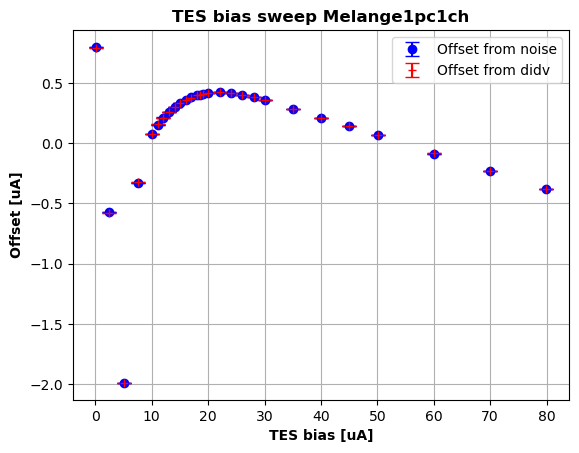

In [6]:
ivanalysis.describe()

# plot raw offset (no analysis)
ivanalysis.plot_ivsweep_offset(channel=channel_name)

In [7]:
# If needed modify/add the number of SC and/or normal bias point
ivanalysis.set_nb_sc_normal_points(channel_name, nnorm=6)
ivanalysis.describe()

List of channels: ['Melange1pc1ch']

Channel Melange1pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame  (28, 44)
       Nb SC points: 3
       Nb Normal points: 6


### Analyze sweep

INFO: Saving filter/TES data to file /sdata2/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20250117_T120104.hdf5! (overwrite=True)


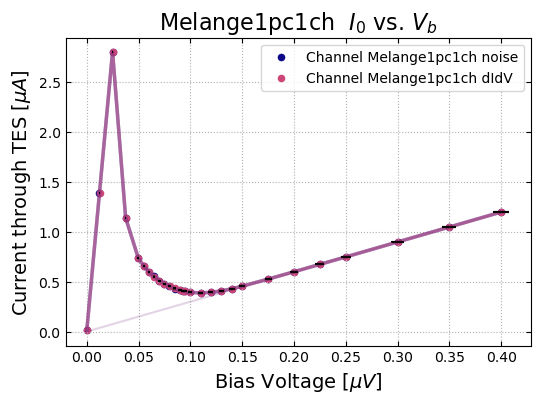

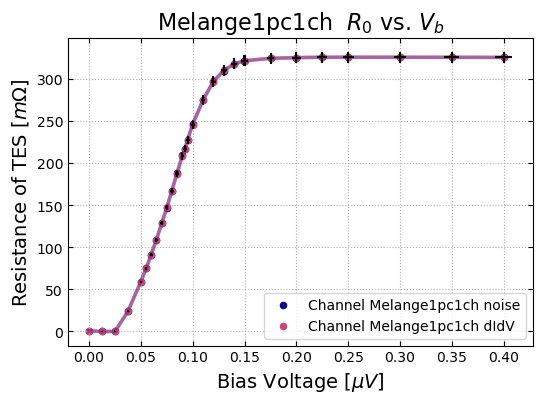

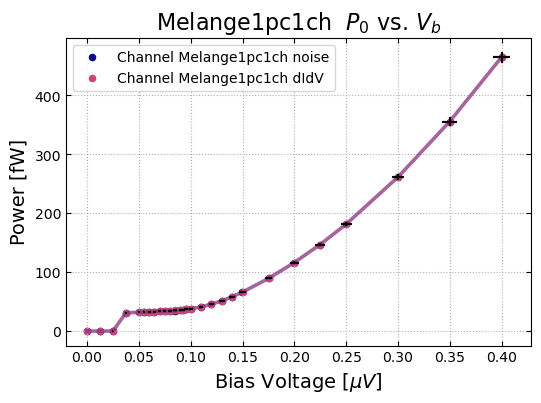

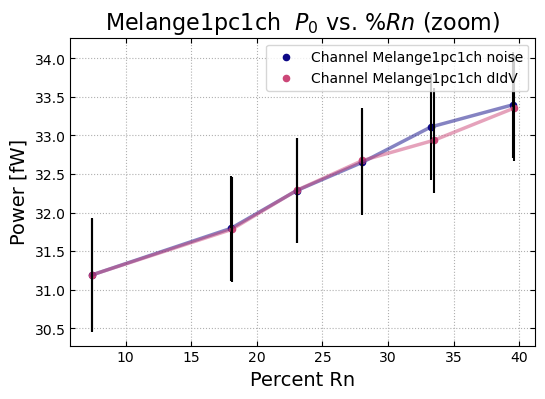

In [8]:
ivanalysis.analyze_sweep(lgc_plot=True, lgc_invert_offset='auto')

### Analyze didV data 


Melange1pc1ch SC dIdV analysis
INFO: Calculating small signal parameters for 1-pole model!


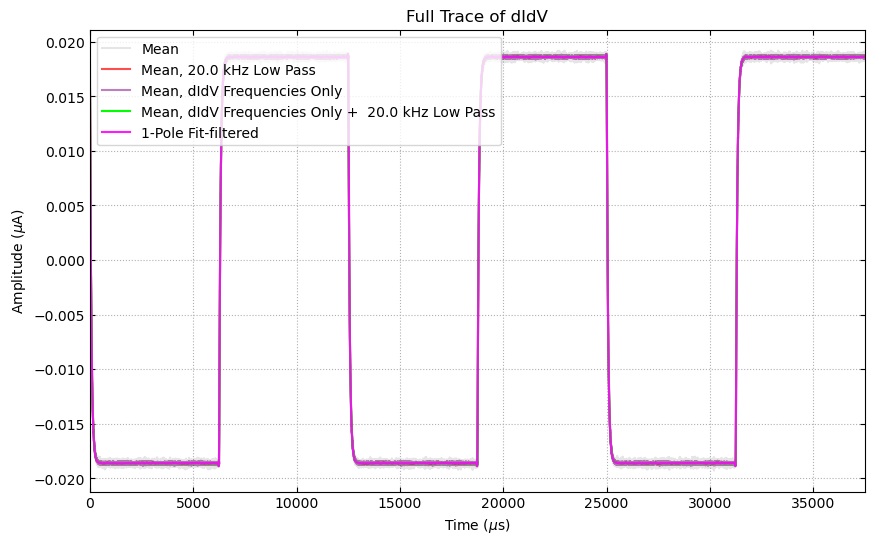

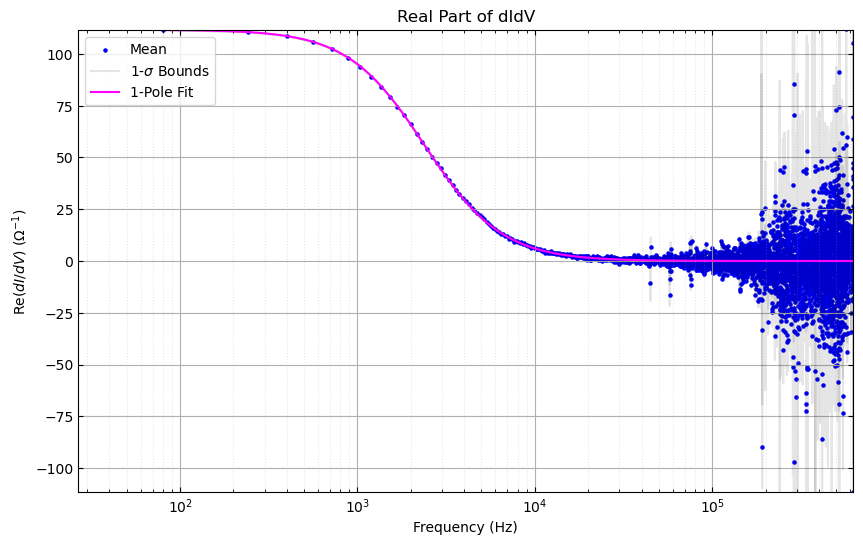

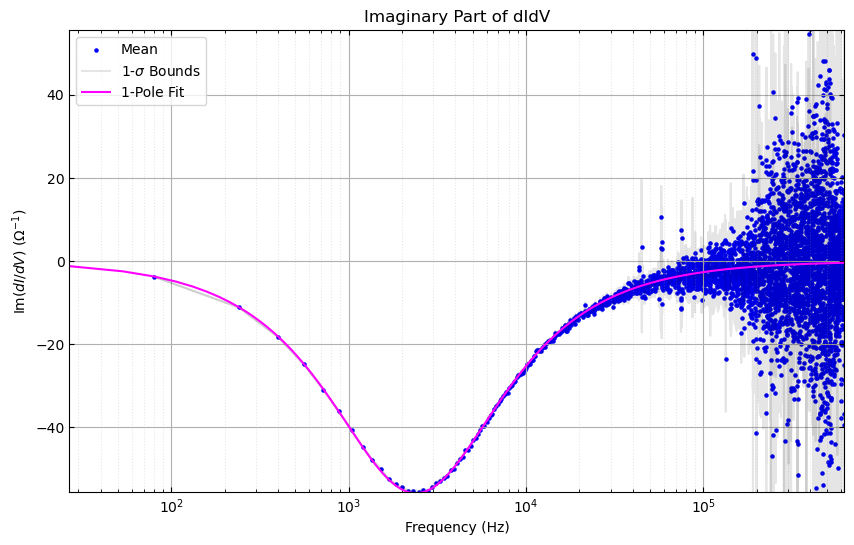

INFO: Calculating small signal parameters for 1-pole model!
Melange1pc1ch Rp from dIdV fit = 3.96 +/- 0.008 mOhms
Melange1pc1ch Rp from IV Sweep = 3.92 +/- 0.078 mOhms
INFO: Saving filter/TES data to file /sdata2/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20250117_T120104.hdf5! (overwrite=True)

Melange1pc1ch Normal dIdV analysis
INFO: Calculating small signal parameters for 1-pole model!


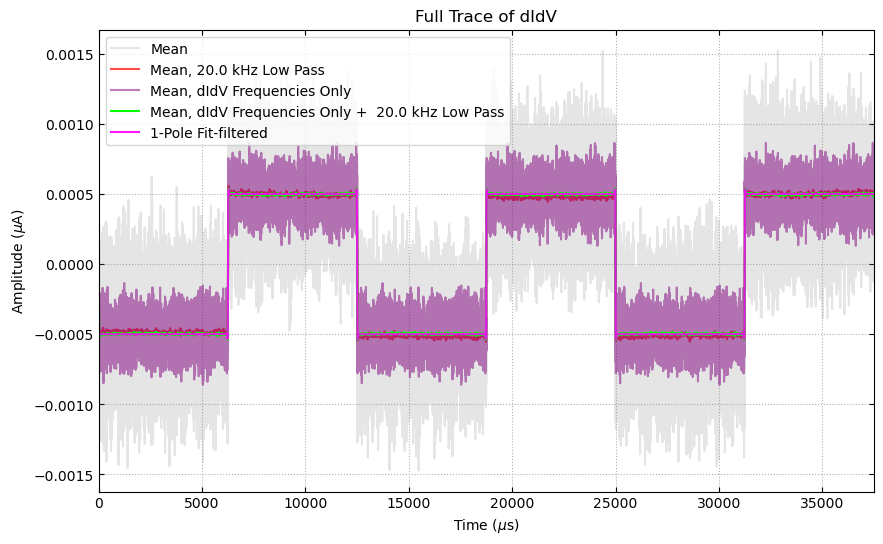

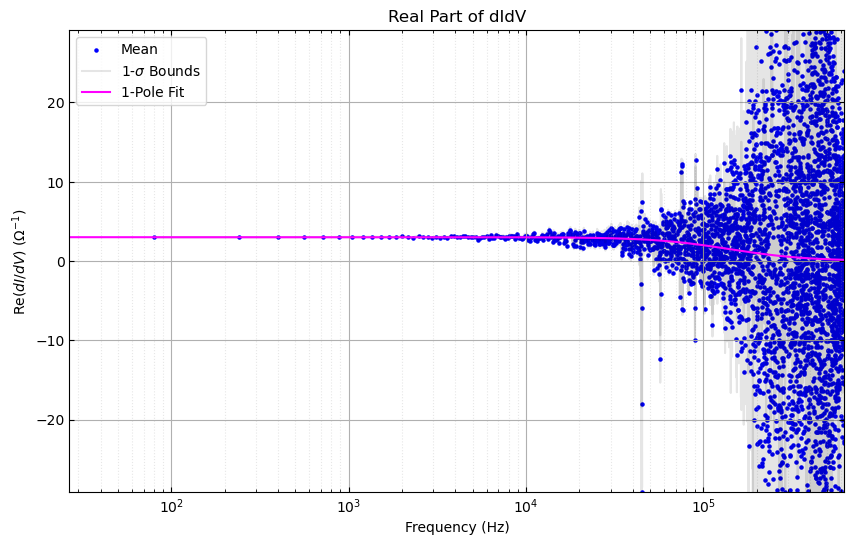

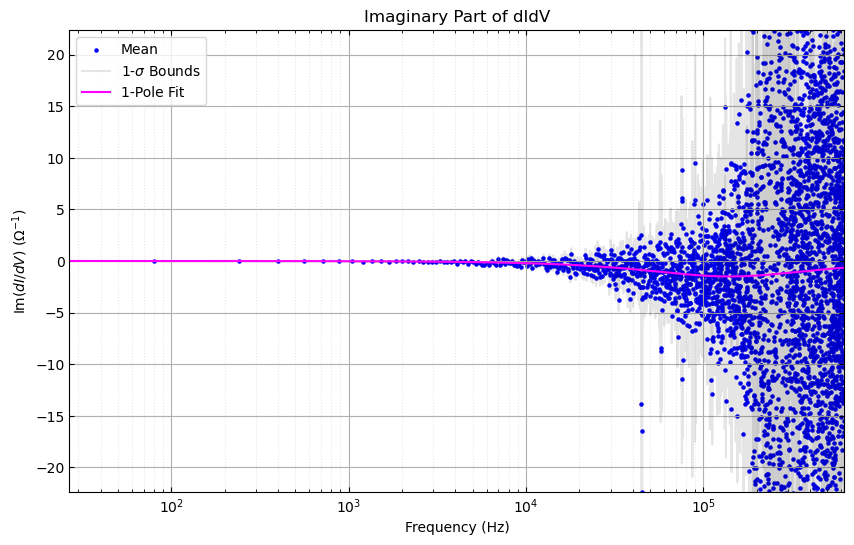

INFO: Calculating small signal parameters for 1-pole model!
INFO: Calculating small signal parameters for 1-pole model!
INFO: Calculating small signal parameters for 1-pole model!
Melange1pc1ch Rn from dIdV fit = 324.02 +/- 0.959 mOhms
Melange1pc1ch Rn from IV Sweep = 325.75 +/- 6.694 mOhms
INFO: Saving filter/TES data to file /sdata2/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20250117_T120104.hdf5! (overwrite=True)

Melange1pc1ch Transition dIdV analysis


Melange1pc1ch TES bias 16.967 uA, R0 = 188.39 mOhms (% Rn = 57.80)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.169

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000246 s
Tau2: 2.1e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 2.14e-06 s
Tau_minus: 0.000171 

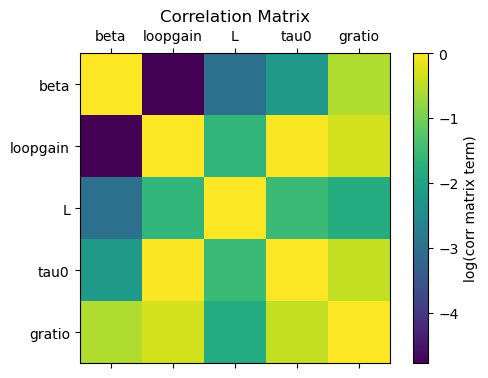

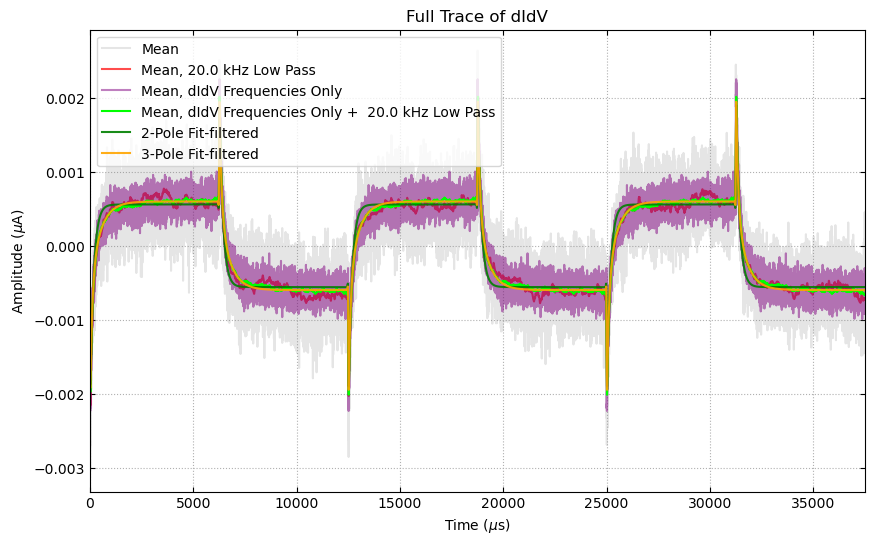

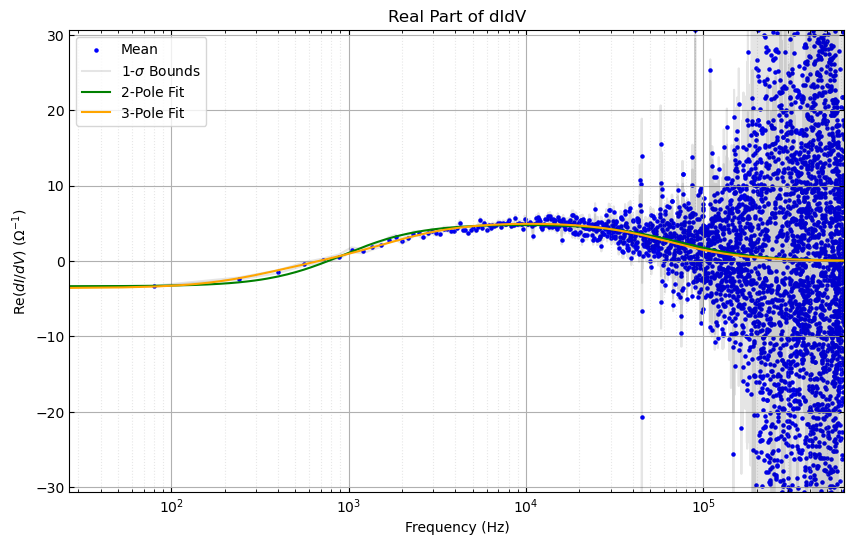

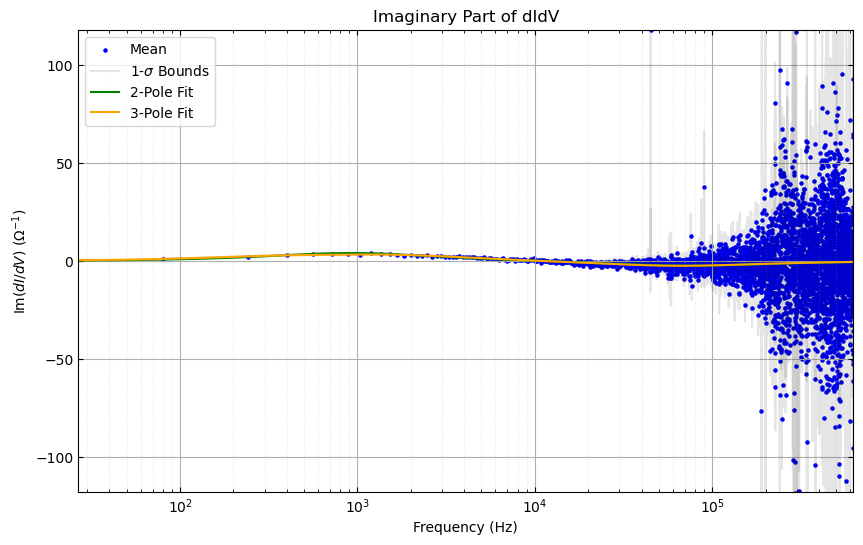



Melange1pc1ch TES bias 15.990 uA, R0 = 167.41 mOhms (% Rn = 51.40)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.172

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000218 s
Tau2: 2.34e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 2.4e-06 s
Tau_minus: 0.000169 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 5.151 +/- 0.2228
beta = 0.100 +/- 0.0230
gratio = -0.000 +/- 0.0000
tau0 = 0.905 +/- 0.04806 ms
L = 451.294 +/- 10.9356 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.164

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000311 s
Tau2: 2.68e-06 s
Tau3: 0.0002815 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 2.78e-06 s
Tau_minus: 9.2e-05 s
Tau_third: 0.0004274 s

Small Signal Parameter

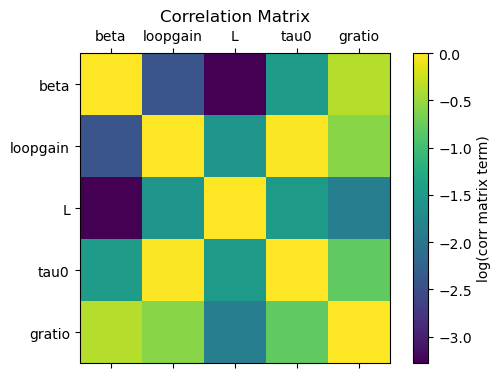

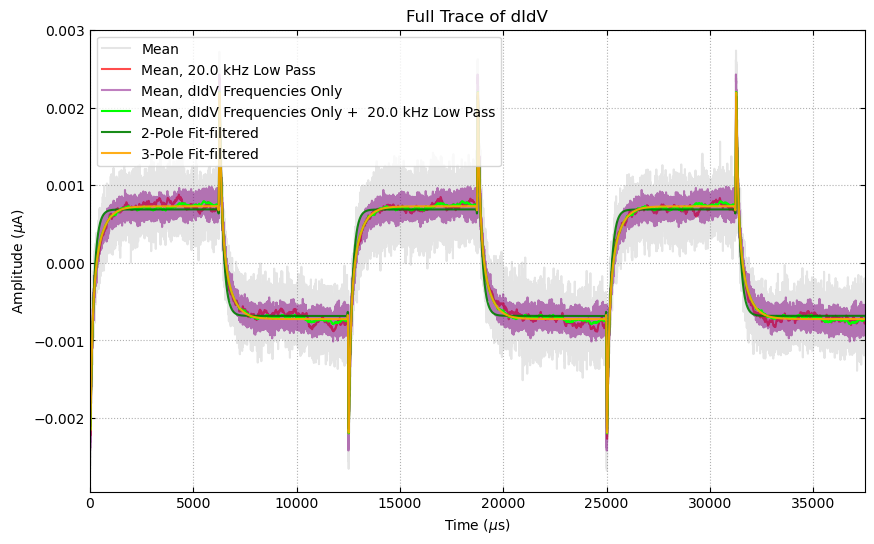

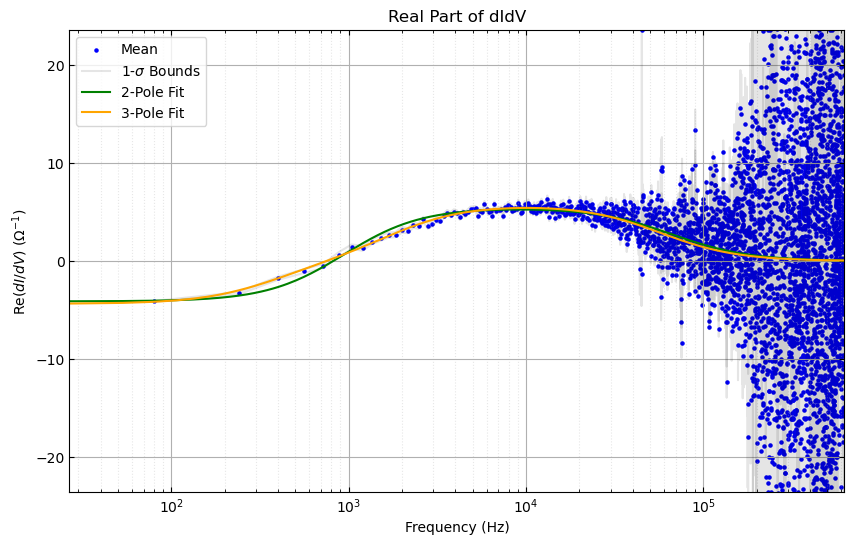

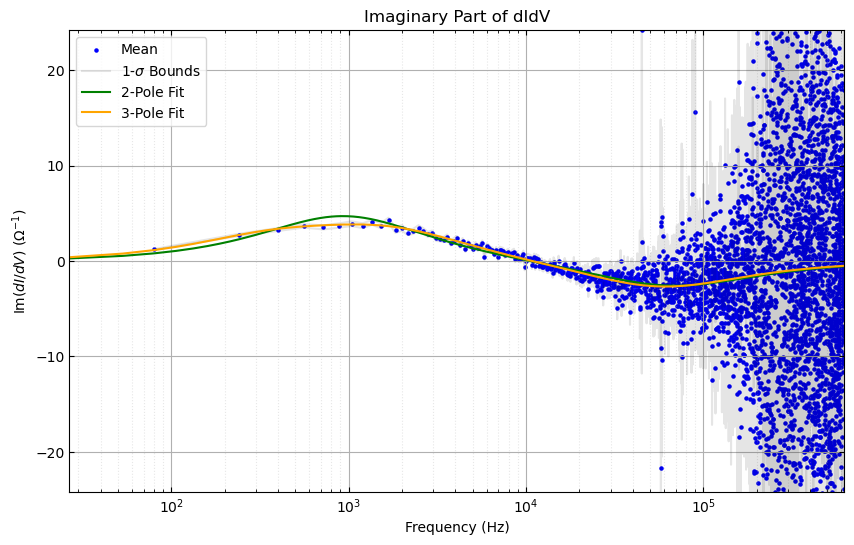



Melange1pc1ch TES bias 15.013 uA, R0 = 147.12 mOhms (% Rn = 45.20)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.175

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000187 s
Tau2: 2.5e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 2.57e-06 s
Tau_minus: 0.000165 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 6.541 +/- 0.3705
beta = 0.147 +/- 0.0243
gratio = -0.000 +/- 0.0000
tau0 = 1.04 +/- 0.06867 ms
L = 443.602 +/- 11.2224 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.170

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000277 s
Tau2: 2.96e-06 s
Tau3: 0.0002023 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 3.09e-06 s
Tau_minus: 7.88e-05 s
Tau_third: 0.0003398 s

Small Signal Parameter

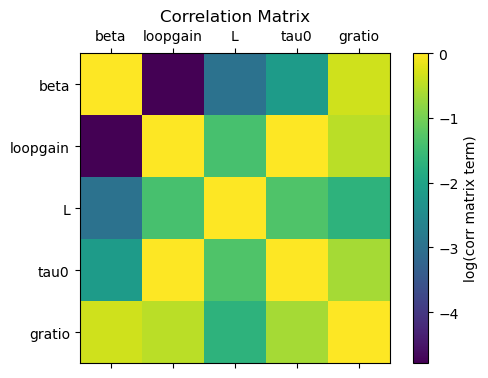

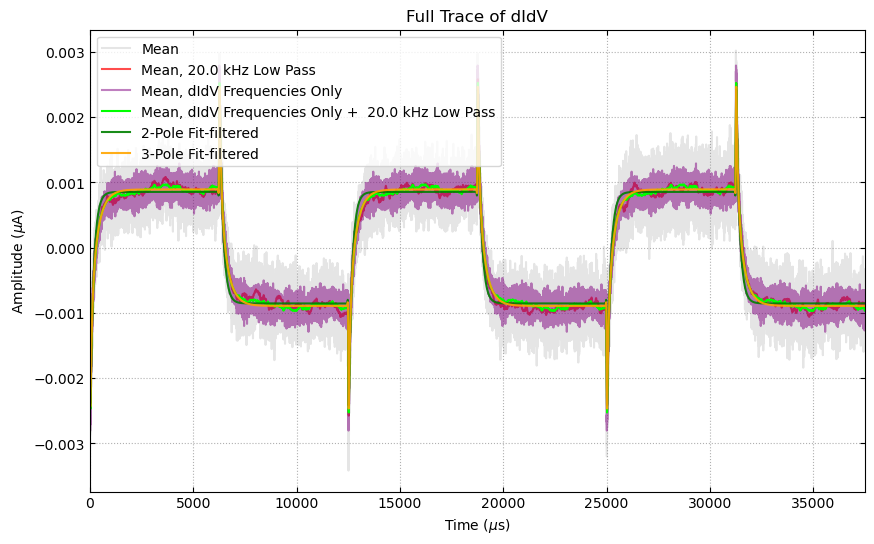

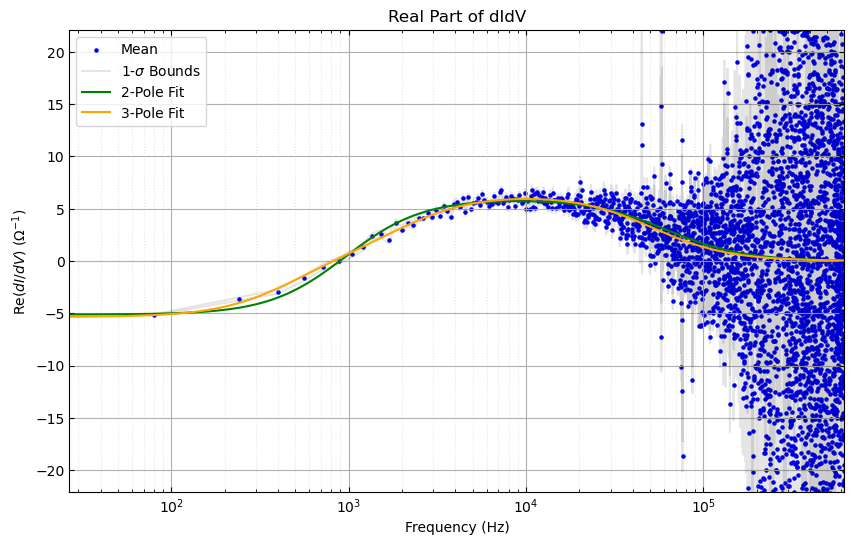

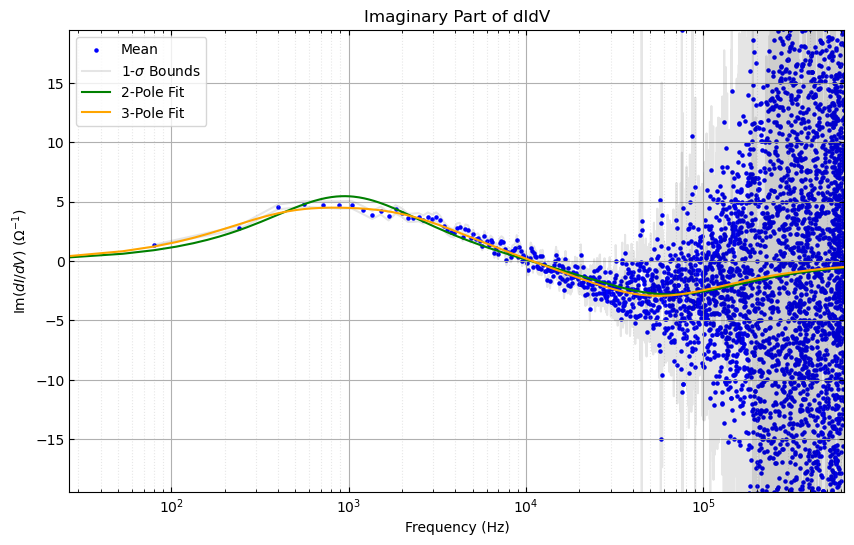



Melange1pc1ch TES bias 14.036 uA, R0 = 128.77 mOhms (% Rn = 39.50)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.171

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000172 s
Tau2: 2.92e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 3.02e-06 s
Tau_minus: 0.000163 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 7.743 +/- 0.5210
beta = 0.159 +/- 0.0245
gratio = -0.000 +/- 0.0000
tau0 = 1.16 +/- 0.08931 ms
L = 461.392 +/- 8.8920 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000241 s
Tau2: 3.36e-06 s
Tau3: 0.0001931 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 3.54e-06 s
Tau_minus: 7.86e-05 s
Tau_third: 0.0003251 s

Small Signal Parameter

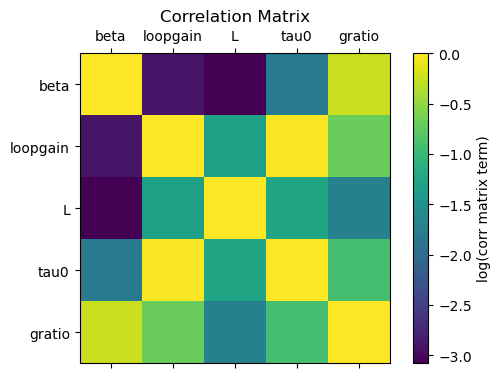

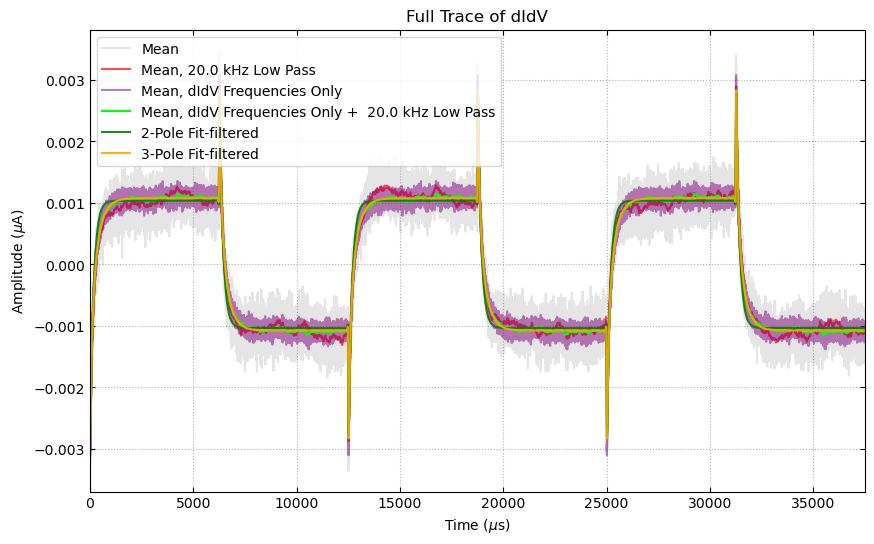

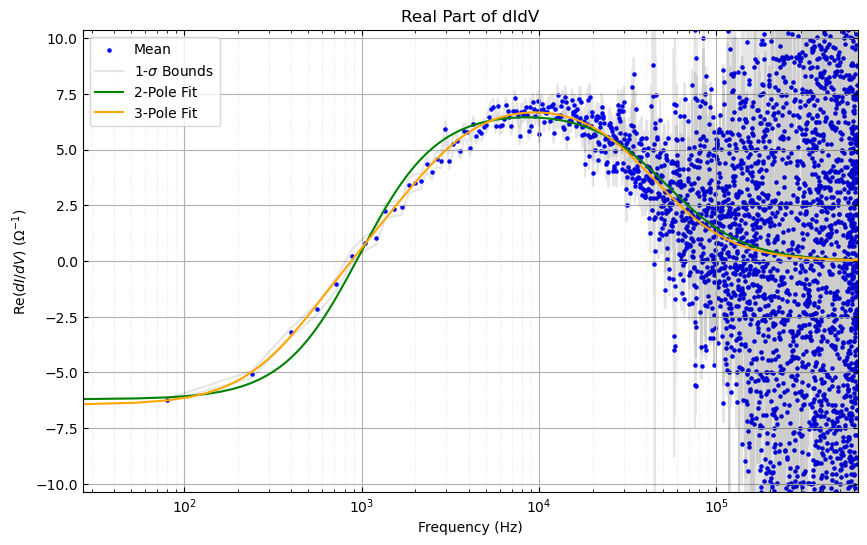

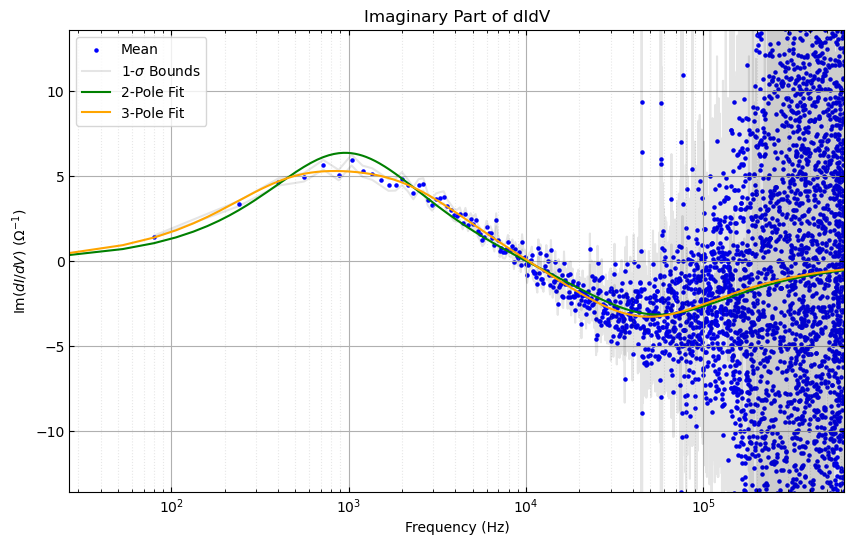



Melange1pc1ch TES bias 12.978 uA, R0 = 108.37 mOhms (% Rn = 33.30)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.170

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000151 s
Tau2: 3.7e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 3.89e-06 s
Tau_minus: 0.000156 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 9.396 +/- 0.7804
beta = 0.200 +/- 0.0258
gratio = -0.000 +/- 0.0000
tau0 = 1.27 +/- 0.1174 ms
L = 514.512 +/- 9.8037 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000184 s
Tau2: 4.18e-06 s
Tau3: 0.000258 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 4.48e-06 s
Tau_minus: 8.62e-05 s
Tau_third: 0.0003902 s

Small Signal Parameters:


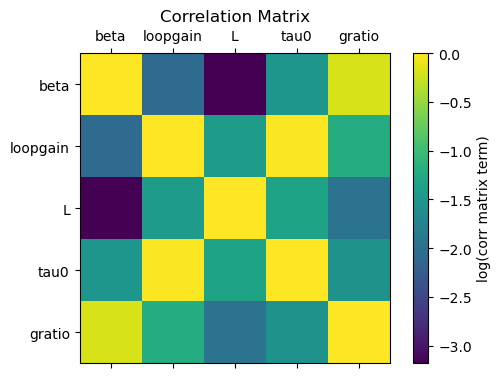

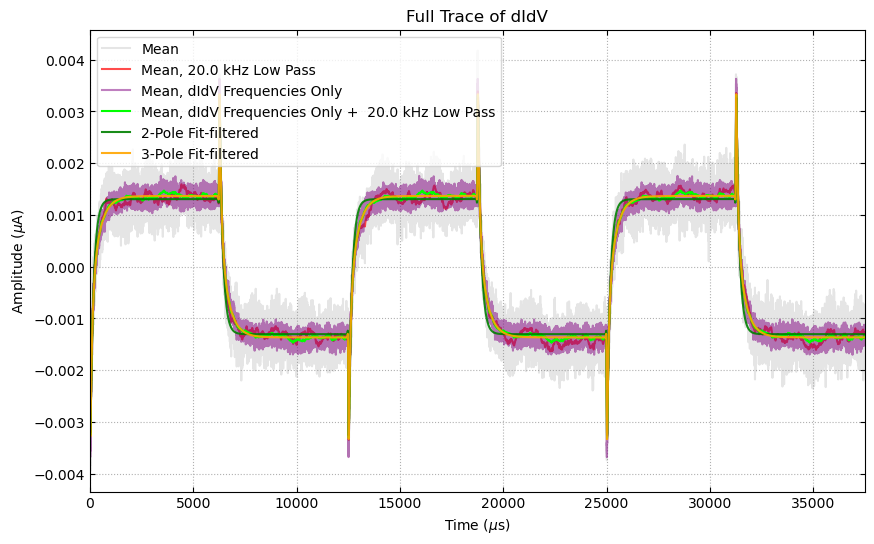

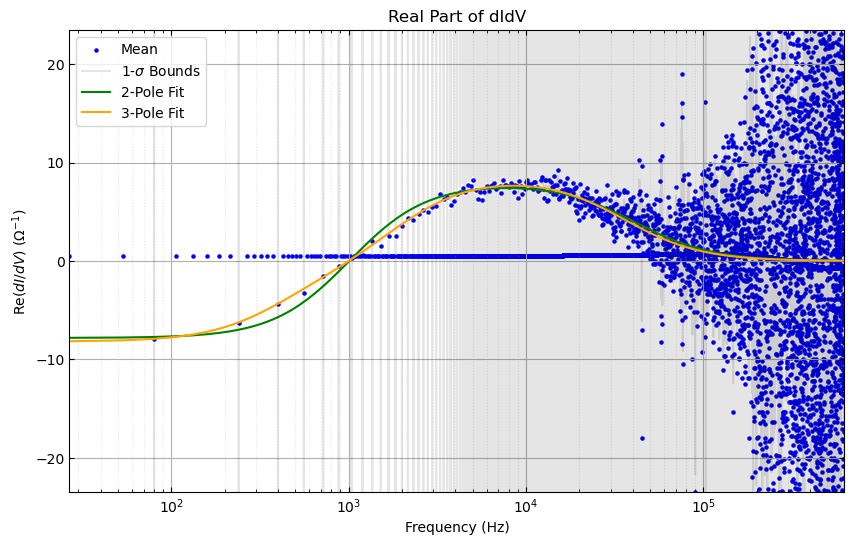

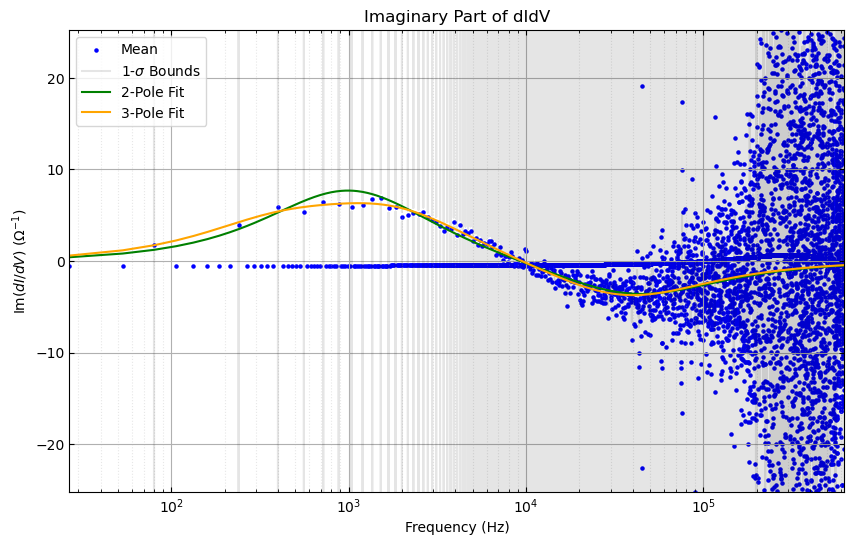



Melange1pc1ch TES bias 12.001 uA, R0 = 91.35 mOhms (% Rn = 28.00)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.166

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000136 s
Tau2: 3.82e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 4.02e-06 s
Tau_minus: 0.000161 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 12.486 +/- 1.3608
beta = 0.271 +/- 0.0274
gratio = -0.000 +/- 0.0000
tau0 = 1.57 +/- 0.1851 ms
L = 476.967 +/- 8.0309 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.161

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000168 s
Tau2: 4.35e-06 s
Tau3: 0.0002014 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 4.7e-06 s
Tau_minus: 7.81e-05 s
Tau_third: 0.0003346 s

Small Signal Parameters:

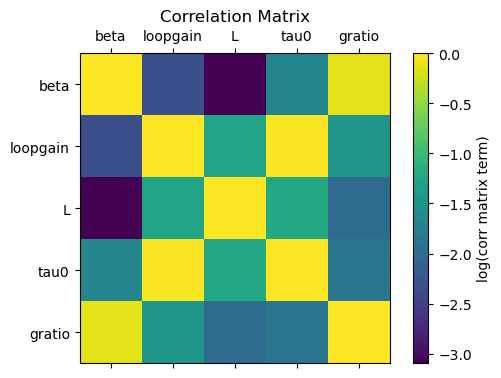

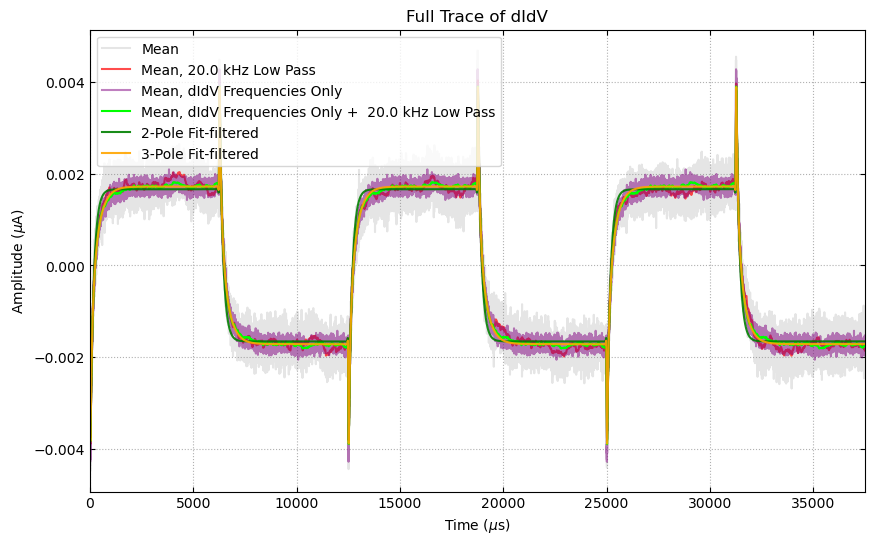

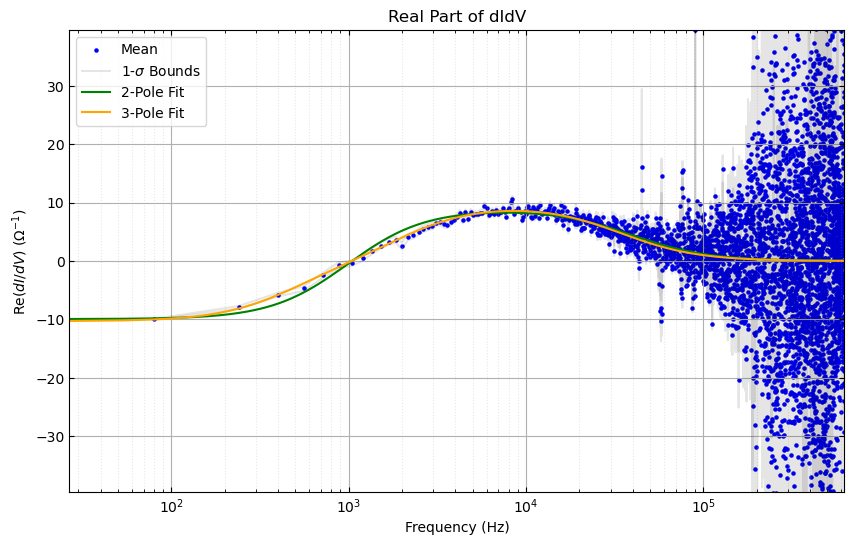

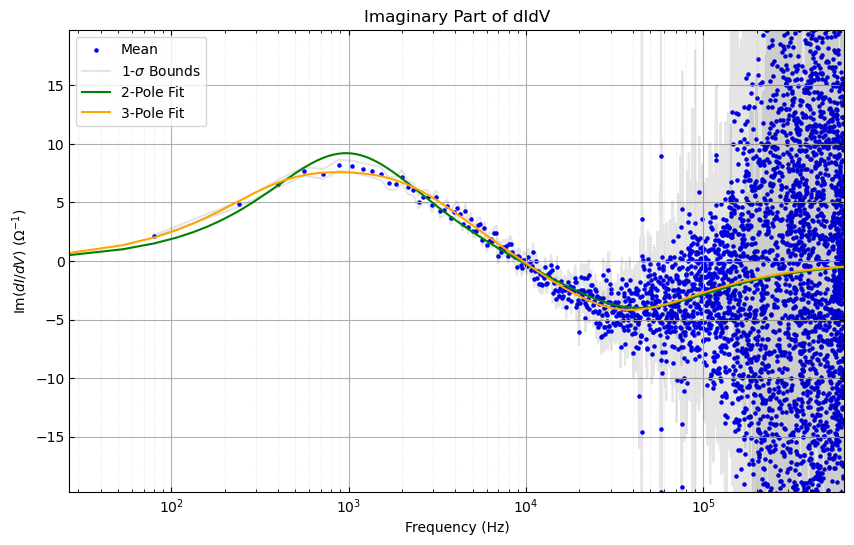



Melange1pc1ch TES bias 11.025 uA, R0 = 75.01 mOhms (% Rn = 23.00)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.174

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000118 s
Tau2: 4.48e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 4.81e-06 s
Tau_minus: 0.000151 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 13.919 +/- 1.6541
beta = 0.348 +/- 0.0293
gratio = -0.000 +/- 0.0000
tau0 = 1.52 +/- 0.194 ms
L = 492.949 +/- 7.0595 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.168

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000138 s
Tau2: 5.1e-06 s
Tau3: 0.0001897 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 5.63e-06 s
Tau_minus: 7.51e-05 s
Tau_third: 0.0003107 s

Small Signal Parameters:


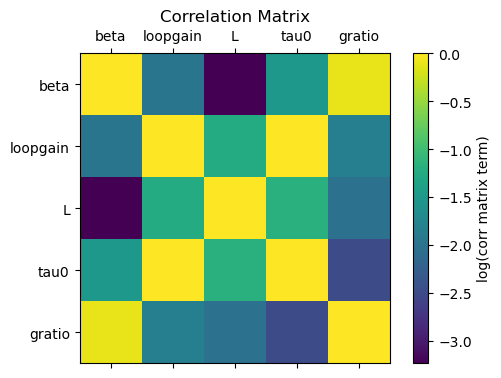

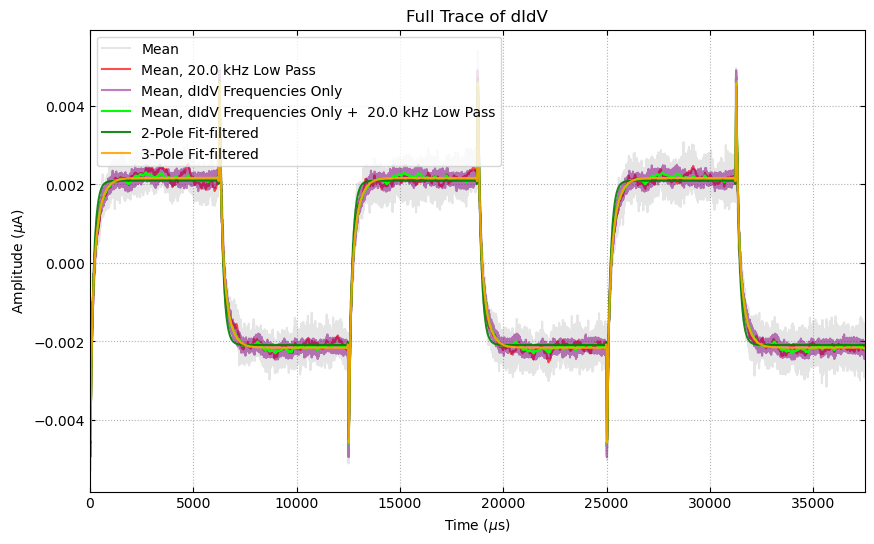

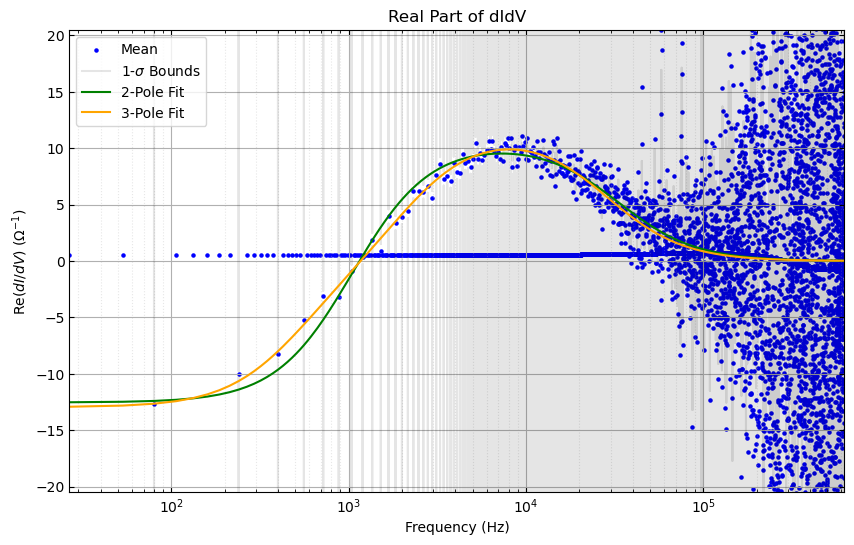

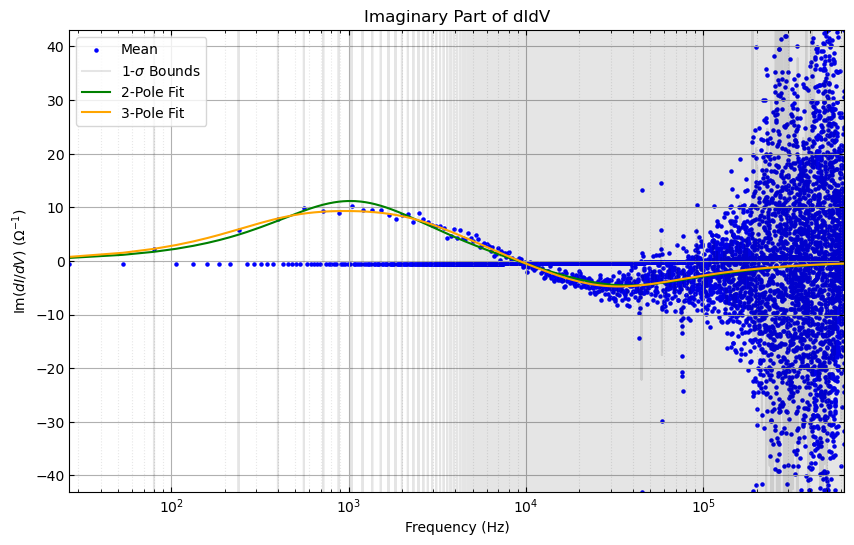



Melange1pc1ch TES bias 9.966 uA, R0 = 58.72 mOhms (% Rn = 18.00)

INFO: Fitting dIdV (2 and 3-poles)
INFO: Calculating small signal parameters for 2-poles model 
INFO: Calculating small signal parameters for 3-poles model 
INFO: Calculating dPdI (2 and 3-poles)

Results from 2-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.173

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000103 s
Tau2: 5.63e-06 s
Tau3: 0 s

True dIdV Poles (from 2-poles fit): 
Tau_plus: 6.21e-06 s
Tau_minus: 0.000149 s
Tau_third: 0 s

Small Signal Parameters:
l (loop gain) = 17.851 +/- 2.6960
beta = 0.424 +/- 0.0313
gratio = -0.000 +/- 0.0000
tau0 = 1.74 +/- 0.2775 ms
L = 521.092 +/- 5.8275 nH

Results from 3-poles dIdV fit
---------------------------------

Fit chi2/Ndof = 0.165

Fit time constants, NOT dIdV Poles: 
Tau1: 0.000113 s
Tau2: 6.31e-06 s
Tau3: 0.0002376 s

True dIdV Poles (from 3-poles fit): 
Tau_plus: 7.2e-06 s
Tau_minus: 8.16e-05 s
Tau_third: 0.0003589 s

Small Signal Parameters:


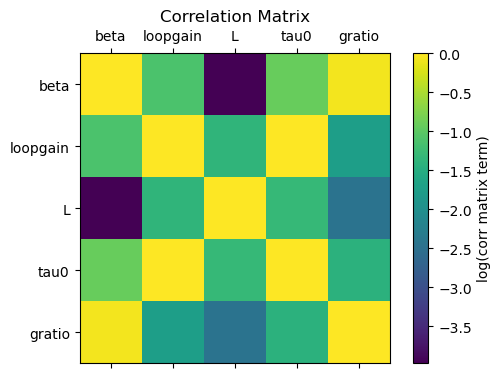

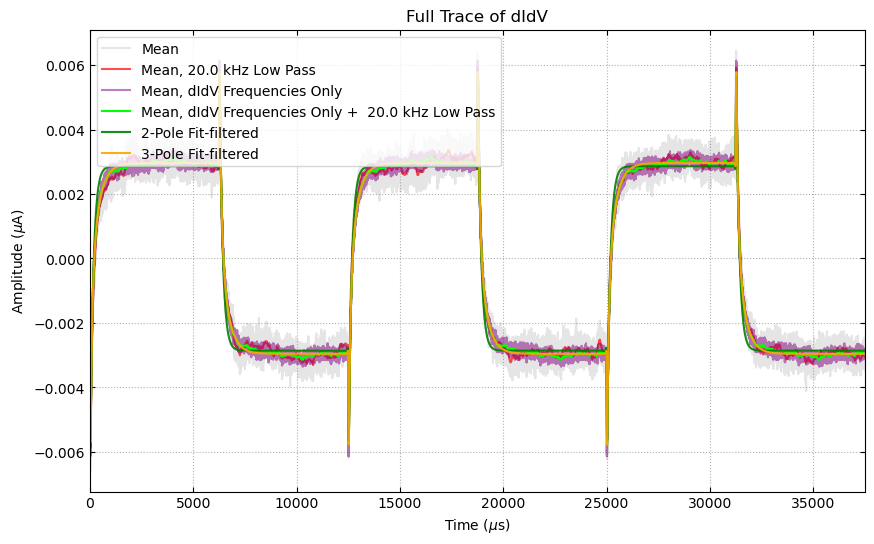

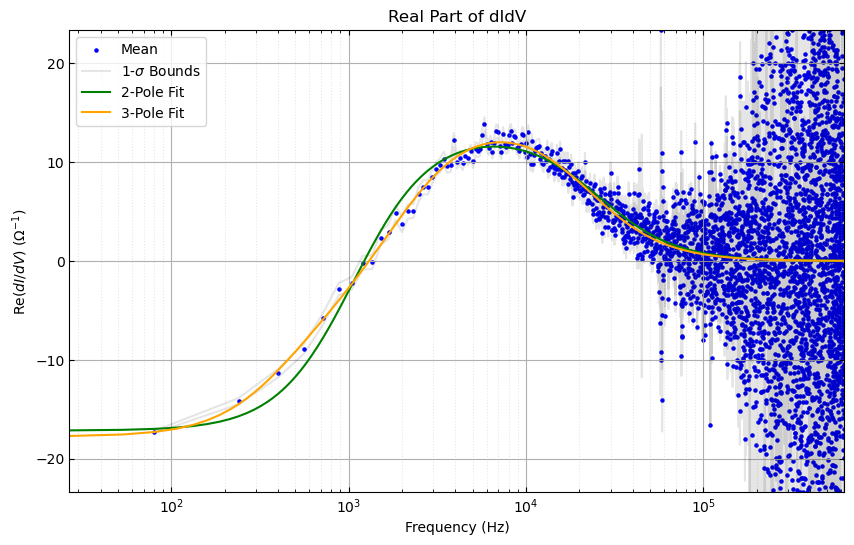

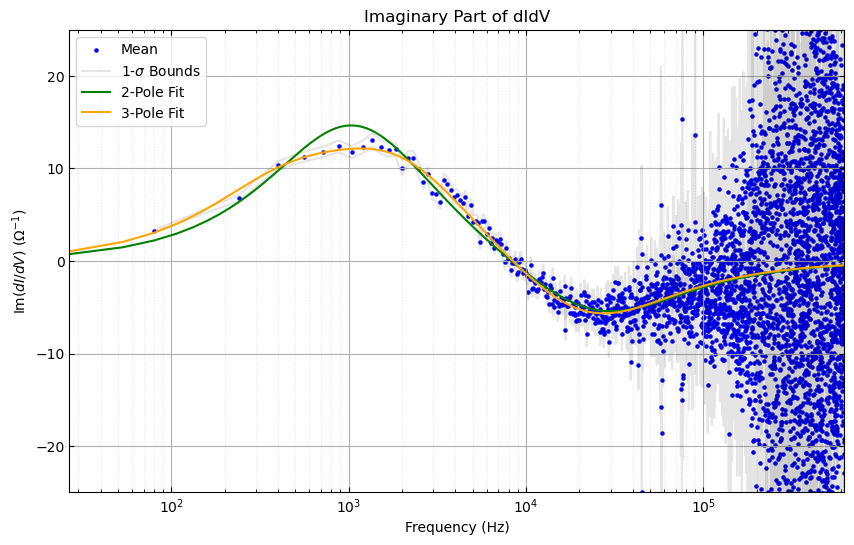

INFO: Saving filter/TES data to file /sdata2/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20250117_T120104.hdf5! (overwrite=True)


In [9]:
ivanalysis.analyze_didv(lgc_plot=True,
                        transition_percent_rn_max=60,
                        transition_percent_rn_min=15)

#### dIdV analysis summary

Summary dIdV Analysis for Melange1pc1ch

TES Superconducting Measurements:

Rp from dIdV fit = 3.96 +/- 0.008 mOhms
Rp rom IV Sweep = 325.75 +/- 6.694 mOhms

TES Normal Measurements:

Rn from dIdV fit = 324.02 +/- 0.959 mOhms
Rn rom IV Sweep = 325.75 +/- 6.694 mOhms

Measurements TES in Transition 3-poles Fit:


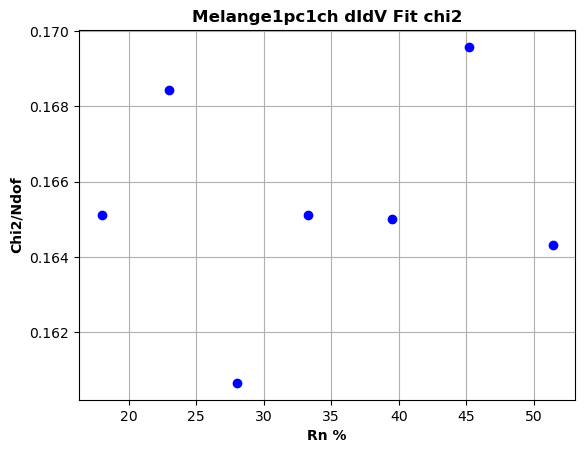


Small Signal Parameters


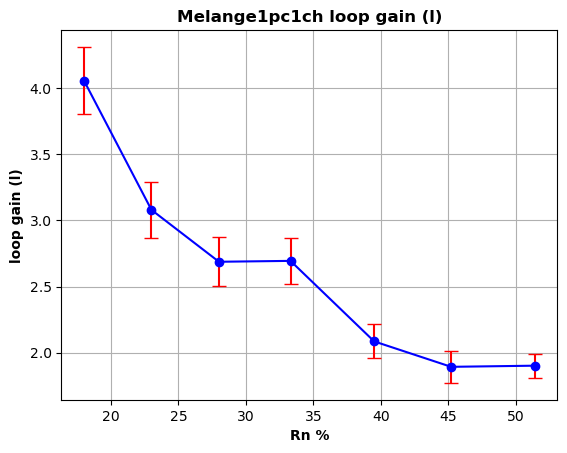

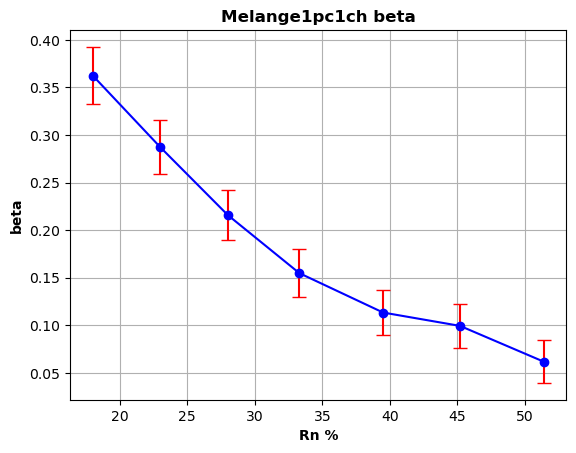

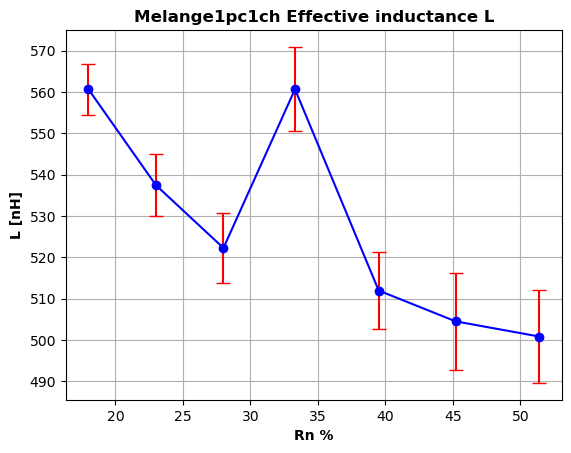

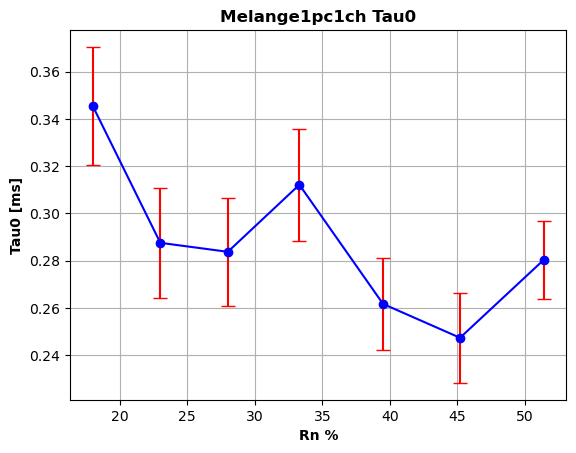

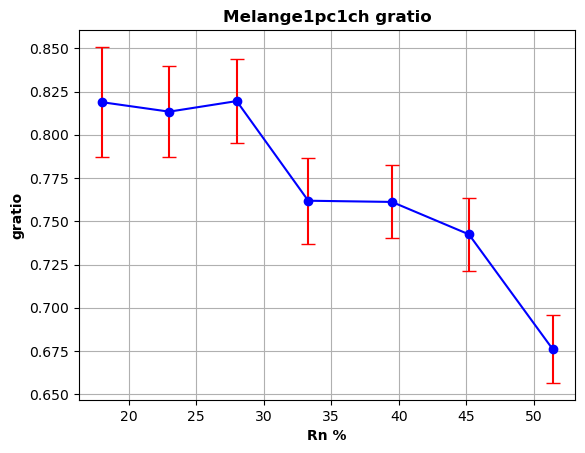


Fall Times


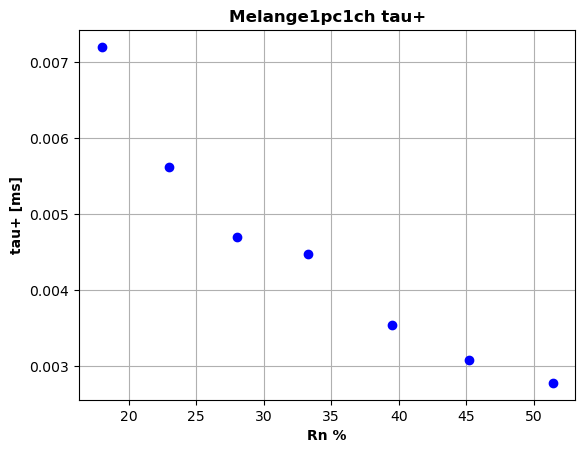

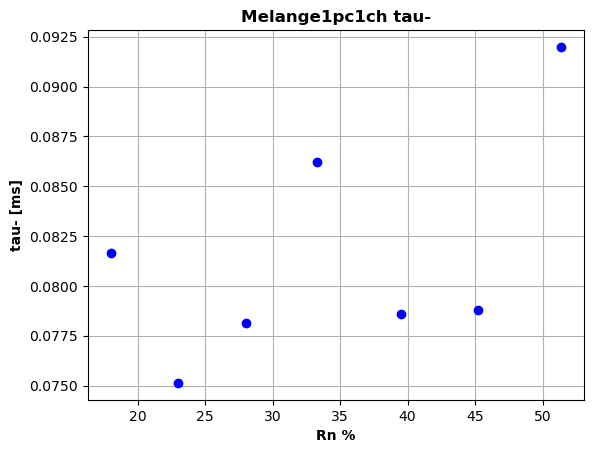

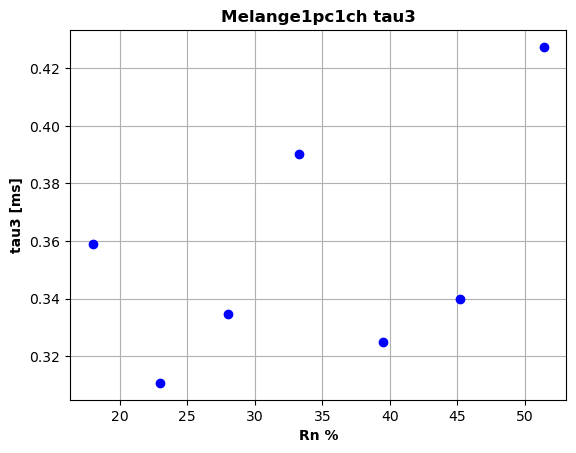

In [10]:
ivanalysis.plot_didv_summary(channel_name, poles=3)

###  Energy Resolution

Energy resolution is calculated using a dirac delta power input. 

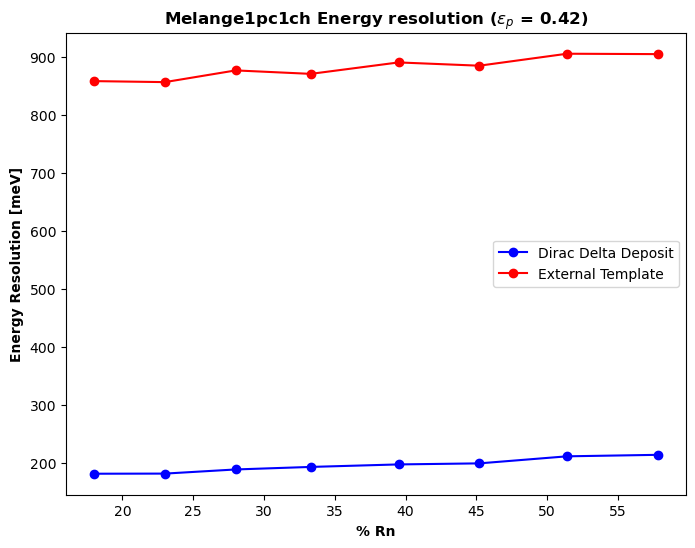

INFO: Saving filter/TES data to file /sdata2/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20250117_T120104.hdf5! (overwrite=True)


In [11]:
# let's define a template based on the pulse data (sum of  3 two-pole pulses),
# see Roger Romani's detanalysis phonon calibration demo

# dataframe
ivdata = ivanalysis.get_ivsweep_data(channel_name)

# functional form parameters for template (power template)
amplitudes = [1.67e-15, 1.32e-15, 2.39e-17]
fall_times = [44.6e-6, 147.5e-6, 3872.9e-6]
rise_times = [8.79e-6, 8.79e-6, 8.79e-6]

# time array
nb_bins = ivdata['psd'][0].shape[0]
fs = ivdata['fs_noise'][0]
time_array = np.asarray(range(nb_bins))/fs

# define template
template =  qp.utils.make_template_sum_twopoles(time_array, amplitudes, 
                                                rise_times, fall_times, normalize=True)

# if only direc delta power needed, then set argument 
# template=None
ivanalysis.calc_energy_resolution(channels=channel_name, lgc_plot=True, template=template,
                                  collection_eff=0.42, lgc_power_template=True)

## Noise Analysis

<font color="blue"><b>We now analyze and plot noise PSD with all the theoretical noise components using small signal parameters (2-poles fit)</b></font>

 1. Fit normal noise to get components of the SQUID+Electronics.
 2. Fit SC noise
 3. Analyze transtion noise 


<b>Parameters that are needed:</b>

 * <b>Tc:</b> use function <b><i>set_tc(channel, tc)</i></b>
 * <b>Tbath:</b> 
     * by default, the code automatically use mixing chamber temperature (for each bias points) if stored in raw data
     * If not available, use <b><i>set_bath(tbath)</i></b> function
 * <b>Tload guess:</b>
     * Fit of normal PSD assume a Tload (which is then determined using SC noise PSD fit)
     * By default, the code automatically use CP temperature if stored in raw data
     * To set/change Tload, use function <b><i>set_tload_guess(tload)</i></b>
 * <b> Gta </b>:
     * by default, the code automatically use approximation Gta = 5*p0/tc 
     * To set/change, use function <b><i>set_gta(channel, gta)</i></b>
    

In [12]:
# Set Tc for each channel 
ivanalysis.set_tc(channel_name, 49e-3)

In [13]:
# IF TEMPERATURE NOT AVAILABLE IN RAW DATA or you prefer 
# different values than MC/CP temperature
# Default if temperature recored: Tbath = T MC, Tload = T CP

# set Tbath and Tload guess
ivanalysis.set_tbath(10e-3)
ivanalysis.set_tload_guess(70e-3)


INFO: Calculating Melange1pc1ch SQUID noise from normal noise
INFO: Performing Melange1pc1ch SC Noise Fit
INFO: Channel Melange1pc1ch Tload from SC Fit: 76.95 mK

INFO: Analyzing Melange1pc1ch Noise in Transition for QET bias = 16.967 uA (57.8% Rn)


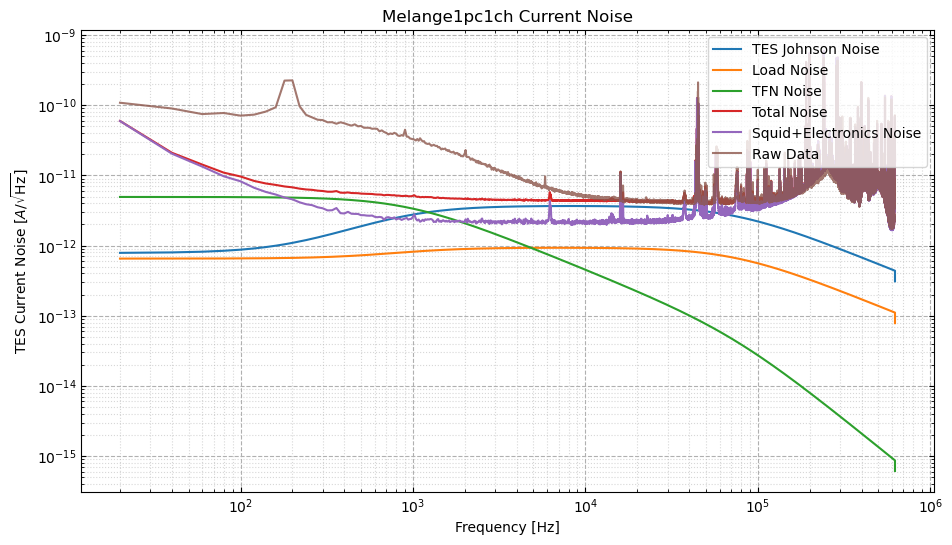

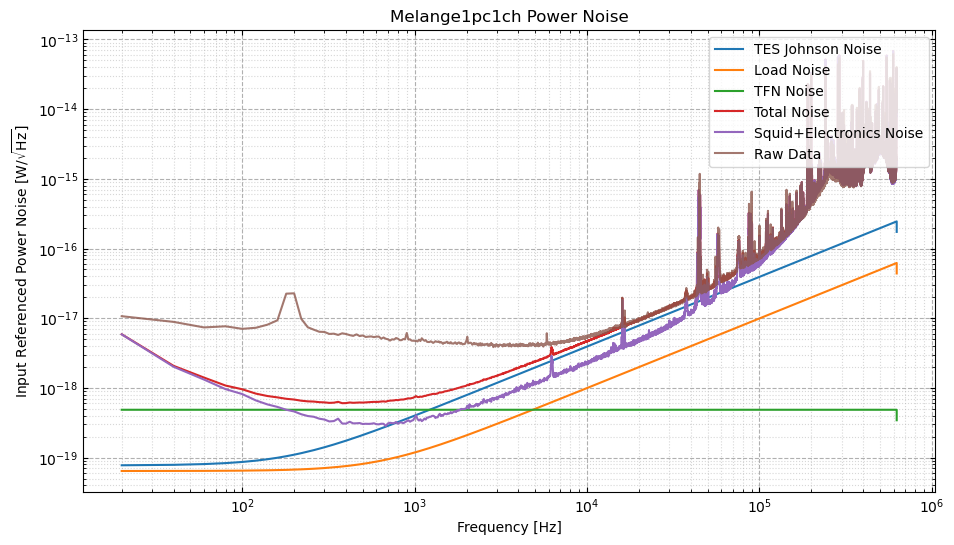


INFO: Analyzing Melange1pc1ch Noise in Transition for QET bias = 15.99 uA (51.4% Rn)


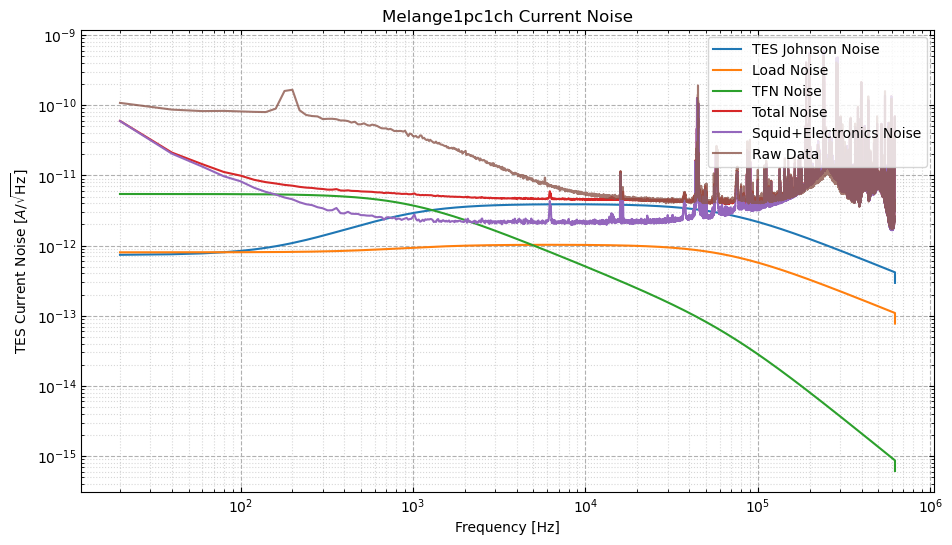

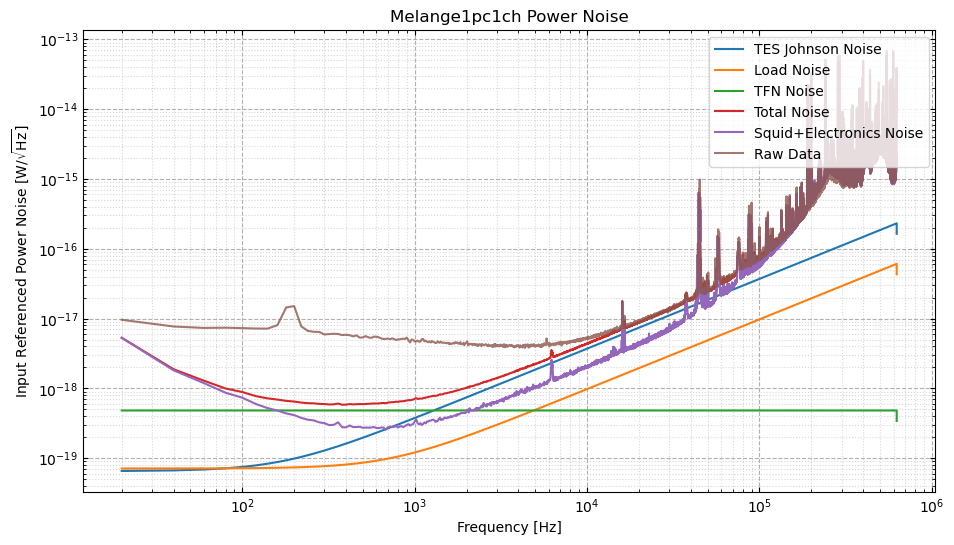


INFO: Analyzing Melange1pc1ch Noise in Transition for QET bias = 15.013 uA (45.2% Rn)


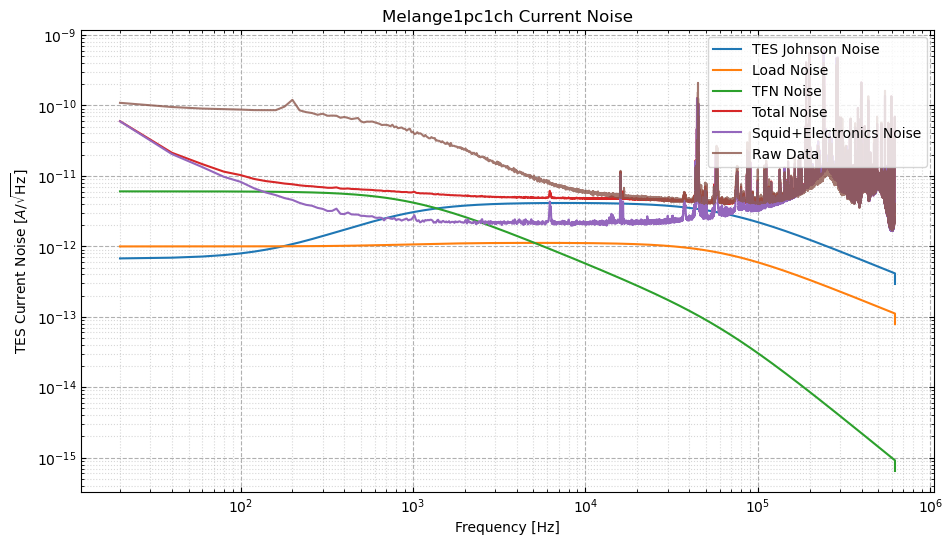

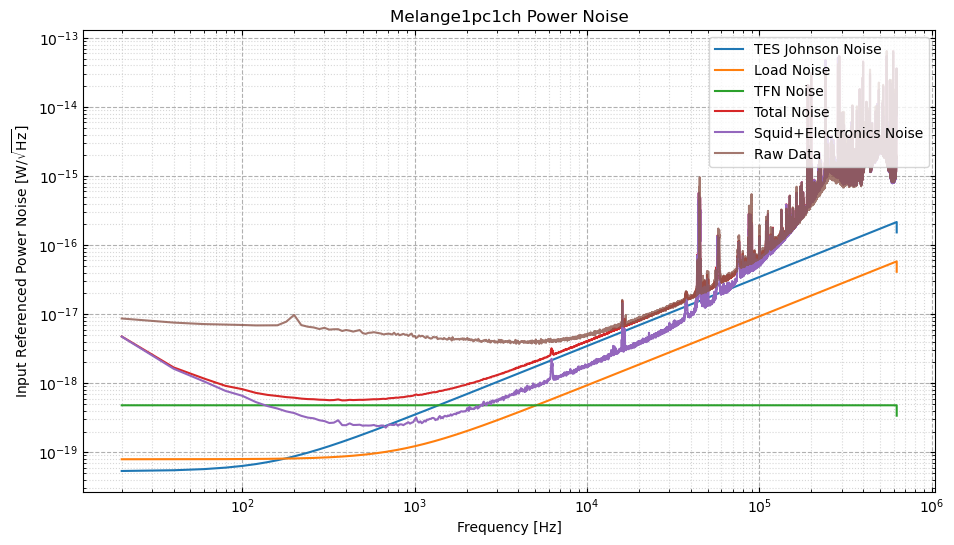


INFO: Analyzing Melange1pc1ch Noise in Transition for QET bias = 14.036 uA (39.5% Rn)


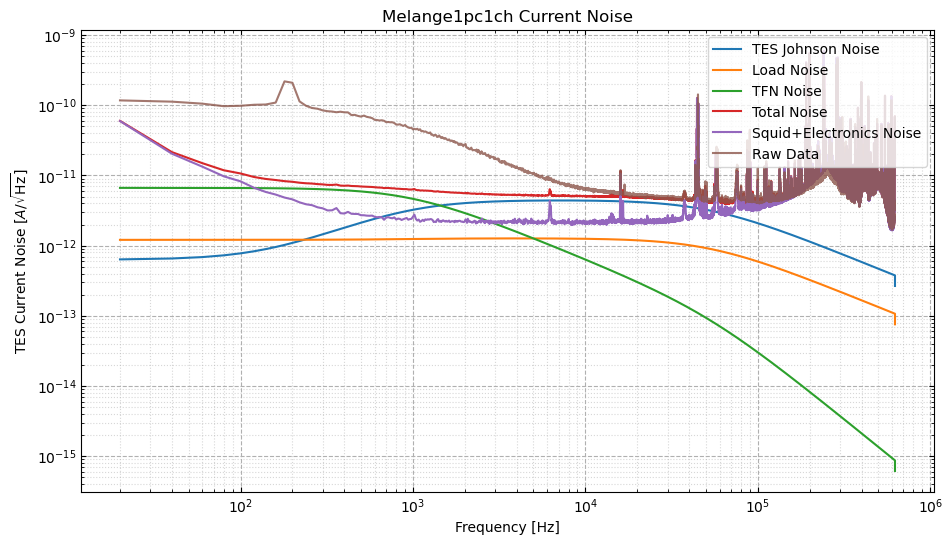

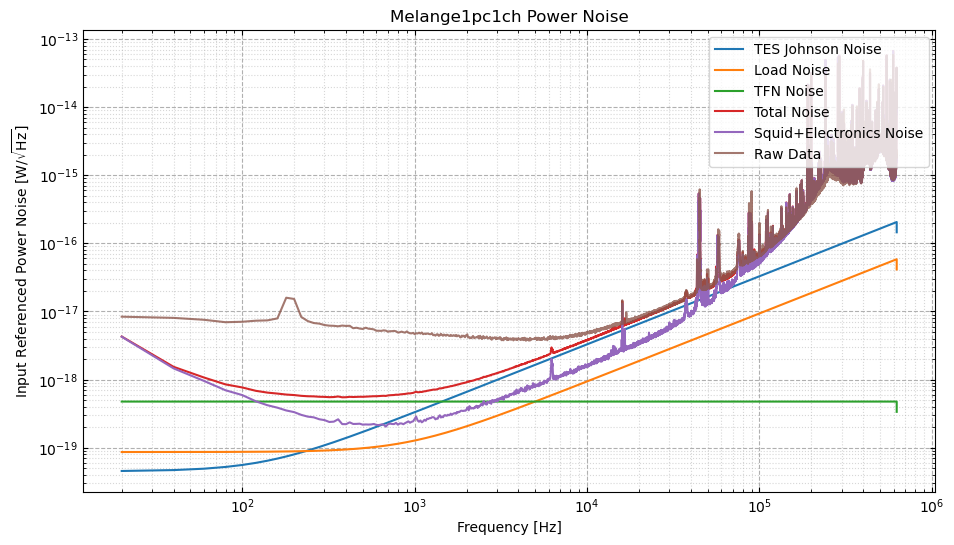


INFO: Analyzing Melange1pc1ch Noise in Transition for QET bias = 12.978 uA (33.3% Rn)


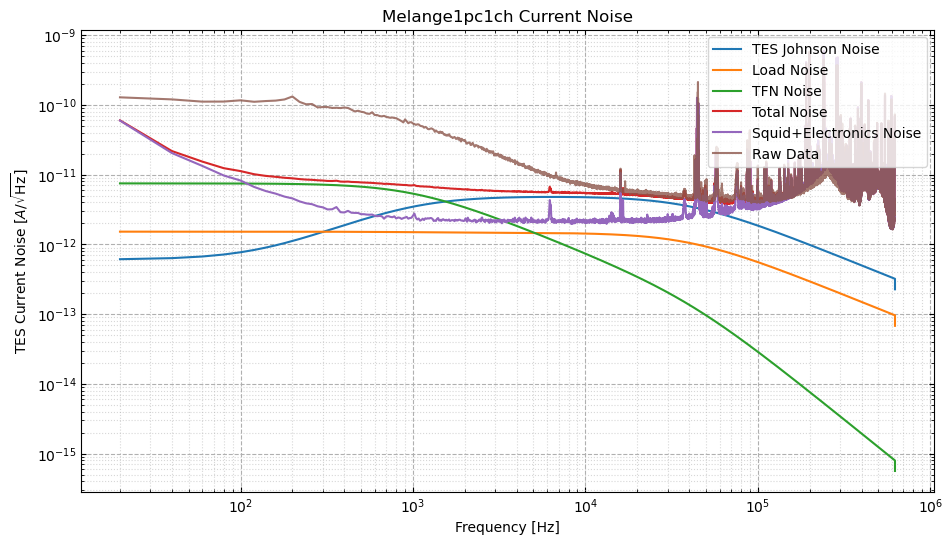

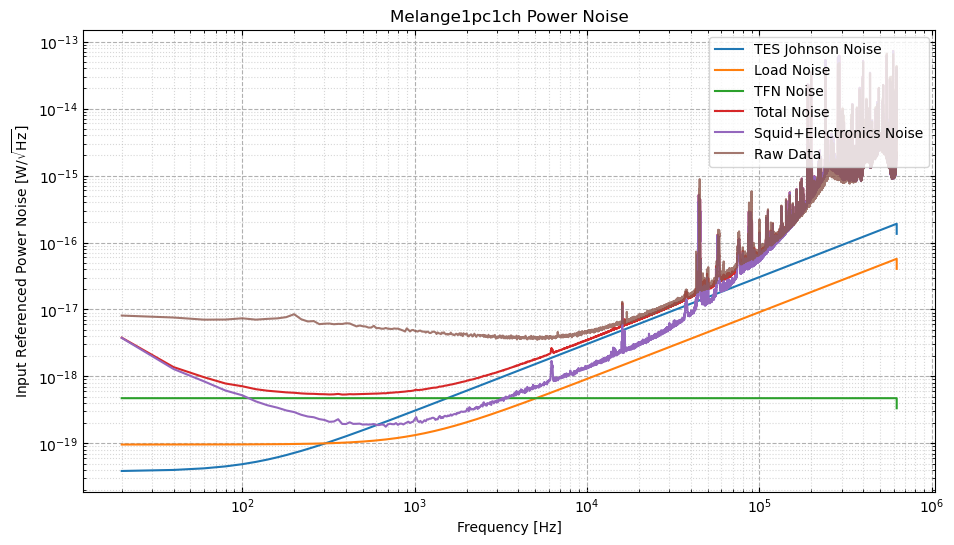


INFO: Analyzing Melange1pc1ch Noise in Transition for QET bias = 12.001 uA (28.0% Rn)


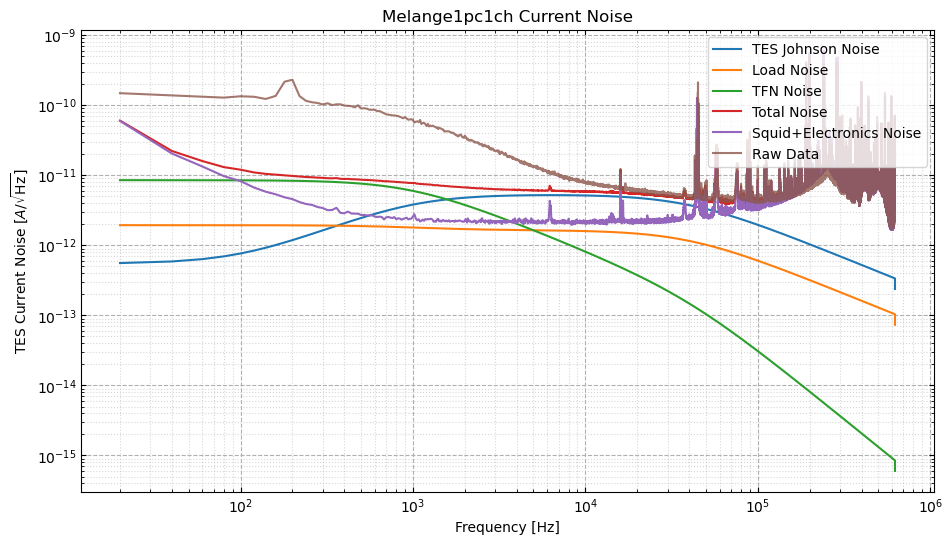

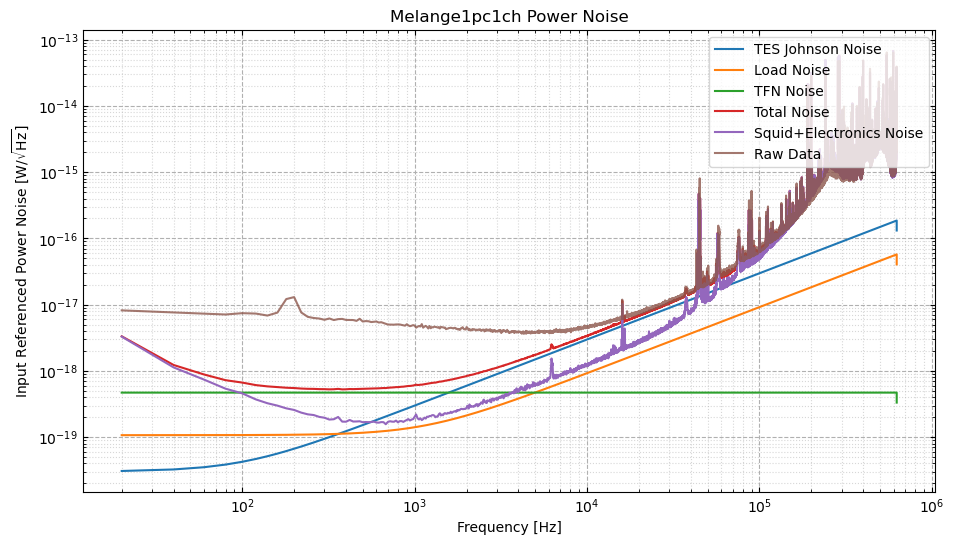


INFO: Analyzing Melange1pc1ch Noise in Transition for QET bias = 11.025 uA (23.0% Rn)


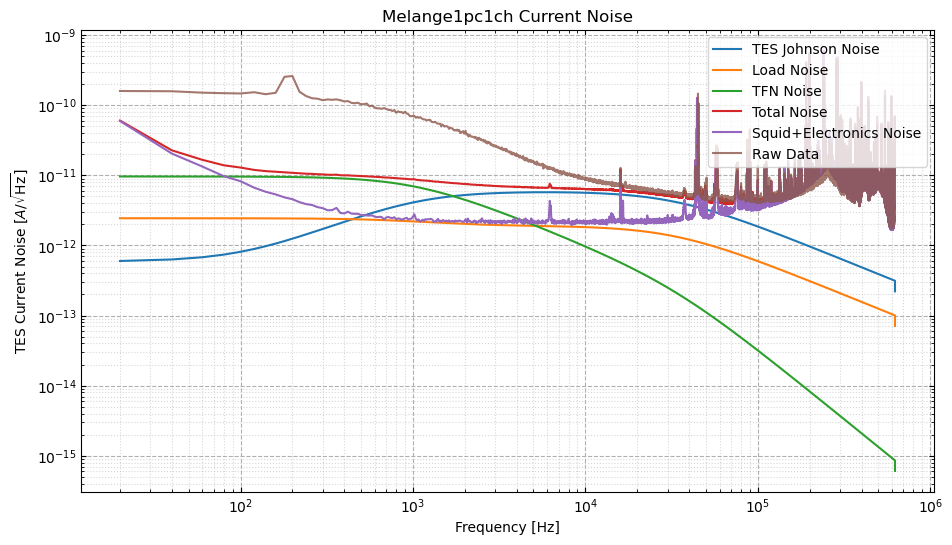

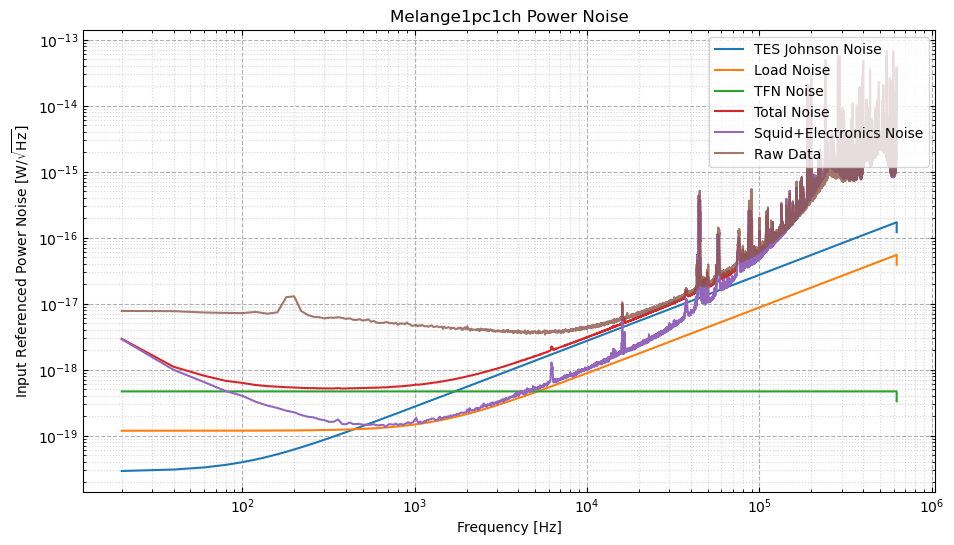


INFO: Analyzing Melange1pc1ch Noise in Transition for QET bias = 9.966 uA (18.0% Rn)


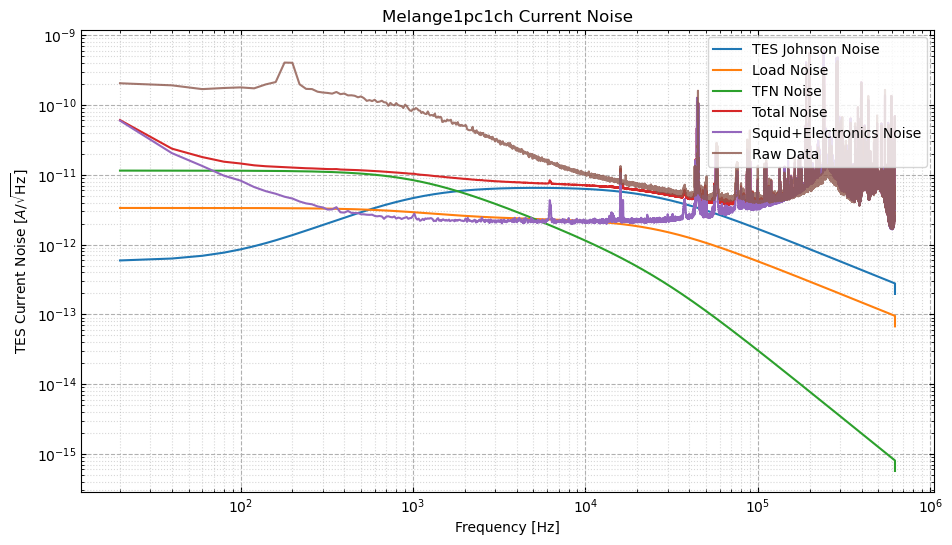

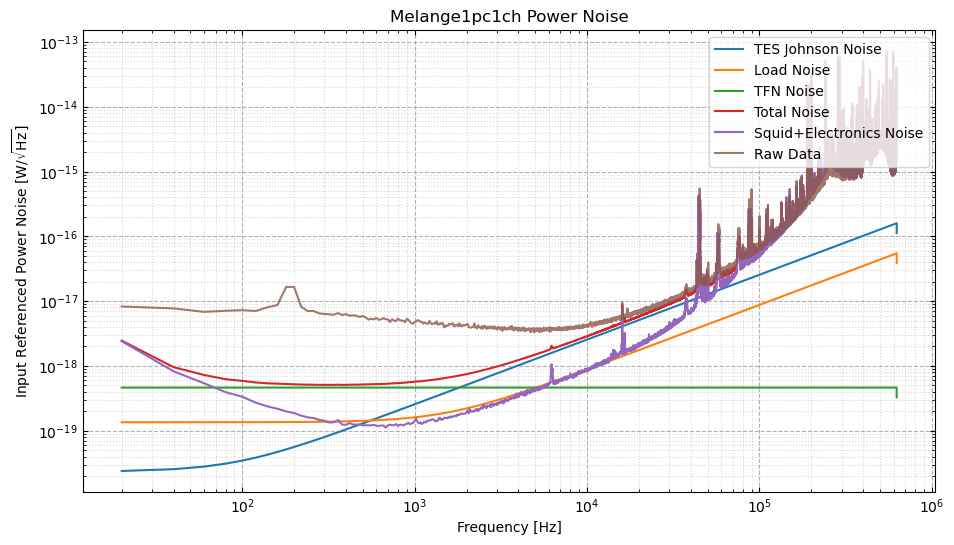

INFO: Saving filter/TES data to file /sdata2/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20250117_T120104.hdf5! (overwrite=True)


In [14]:
# analyze
ivanalysis.analyze_noise(fit_range=(100, 1e5), lgc_plot=True)

## Summary on how to get data from IV/dIdV analysis

#### IV Sweep dataframe

In [15]:
df = ivanalysis.get_ivsweep_data(channel_name)

#### IV Sweep results

In [16]:
results = ivanalysis.get_ivsweep_results(channel_name)
results

{'rp': 0.003918989794649292,
 'rp_err': 7.837979589298584e-05,
 'rn': 0.3257492539738442,
 'rn_err': 0.006693823774012547,
 'rshunt': 0.004999999888241291,
 'rshunt_err': 9.999999776482583e-05,
 'rsh': 0.004999999888241291,
 'rsh_err': 9.999999776482583e-05,
 'i0_off': -8.103902859163865e-07,
 'i0_off_err': 2.3342895366351215e-11,
 'ibias_off': 1.1779131853272438e-08,
 'ibias_off_err': 4.5243221935406476e-11,
 'lgc_invert_offset': True,
 'close_loop_norm': 625000.0,
 'output_variable_offset': -0.07203907519578934,
 'output_variable_gain': 50.0,
 'group_name_sweep': 'iv_didv_I2_D20230615_T231959',
 'i0_variable_offset': -5.763126015663147e-06,
 'sc_didv_fit_L': 5.941270680694226e-07,
 'sc_didv_fit_rp': 0.003963682172810266,
 'sc_didv_fit_dt': 1.0307996682734968e-06,
 'normal_didv_fit_L': 3.6988119766246344e-07,
 'normal_didv_fit_rn': 0.32402046729494605,
 'normal_didv_fit_dt': 1.5125781680581744e-06,
 'noise_model_squid_noise': array([2.67848959e-15, 1.77405054e-21, 2.08208624e-22, ...,

#### dIdV Analysis Object and QETpy didv object 

In [17]:
didv_objects_dict = ivanalysis.get_didv_objects(channel_name)
qetpy_object = didv_objects_dict['transition'][14.036].get_qetpy_object(channel_name)

# print
print(qetpy_object)
pprint(didv_objects_dict)

{'normal': {50.015: <detprocess.core.didv.DIDVAnalysis object at 0x7f32455fab90>,
            60.027: <detprocess.core.didv.DIDVAnalysis object at 0x7f324514dcf0>,
            69.958: <detprocess.core.didv.DIDVAnalysis object at 0x7f32456e0dc0>,
            79.97: <detprocess.core.didv.DIDVAnalysis object at 0x7f32477641f0>},
 'sc': {2.478: <detprocess.core.didv.DIDVAnalysis object at 0x7f3247356590>,
        5.001: <detprocess.core.didv.DIDVAnalysis object at 0x7f3247357730>},
 'transition': {9.966: <detprocess.core.didv.DIDVAnalysis object at 0x7f3244b15ea0>,
                11.025: <detprocess.core.didv.DIDVAnalysis object at 0x7f3244b00100>,
                12.001: <detprocess.core.didv.DIDVAnalysis object at 0x7f32457adfc0>,
                12.978: <detprocess.core.didv.DIDVAnalysis object at 0x7f324522a3b0>,
                14.036: <detprocess.core.didv.DIDVAnalysis object at 0x7f324521a7d0>,
                15.013: <detprocess.core.didv.DIDVAnalysis object at 0x7f324514e560>,
  

#### QETpy IbIs object

In [18]:
ibis_object = ivanalysis.get_ibis_qetpy_object(channel_name)
print(ibis_object)

#### dIdV summary data

In [19]:
didv_summary = ivanalysis.get_didv_summary(channel_name)

#### Get resolution data

In [20]:
resolution_data = ivanalysis.get_resolution_data(channel_name)
pprint(resolution_data)

{'percent_rn': [57.8, 51.4, 45.2, 39.5, 33.3, 28.0, 23.0, 18.0],
 'resolution_dirac': [0.2144001716096707,
                      0.21184330241644345,
                      0.1996904878894968,
                      0.1978913592120017,
                      0.19357919851852834,
                      0.1892146426992763,
                      0.1820857992642462,
                      0.18187318310107065],
 'resolution_template': [0.9043749372172976,
                         0.9050599292901079,
                         0.8844432826193556,
                         0.8900651964619837,
                         0.870378461467172,
                         0.8763239659023743,
                         0.8561582321499687,
                         0.8578987011799128],
 'tes_bias_uA': [16.967, 15.99, 15.013, 14.036, 12.978, 12.001, 11.025, 9.966]}


## Load IV Sweep data/results from HDF5 file

In [22]:
from detprocess import FilterData
file_name = '/sdata2/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20250117_T120104.hdf5'
filterdataIO = FilterData()
filterdataIO.load_hdf5(file_name)
filterdataIO.describe()

INFO: Loading filter data from file /sdata2/runs/run28/filterdata/iv_didv_I2_D20230615_T231959/ivsweep_analysis_D20250117_T120104.hdf5
List of channels: ['Melange1pc1ch']

Channel Melange1pc1ch:
 * Tag "default":
    ivsweep_data: pandas.DataFrame  (28, 124)
       Nb SC points: 3
       Nb Normal points: 6
    ivsweep_results_didv: pandas.Series (24,)
    ivsweep_results_noise: pandas.Series (29,)


In [23]:
df = filterdataIO.get_ivsweep_data(channel_name)
results = filterdataIO.get_ivsweep_results(channel_name)
results

{'rp': 0.003918989794649292,
 'rp_err': 7.837979589298584e-05,
 'rn': 0.3257492539738442,
 'rn_err': 0.006693823774012547,
 'rshunt': 0.004999999888241291,
 'rshunt_err': 9.999999776482583e-05,
 'rsh': 0.004999999888241291,
 'rsh_err': 9.999999776482583e-05,
 'i0_off': -8.103902859163865e-07,
 'i0_off_err': 2.3342895366351215e-11,
 'ibias_off': 1.1779131853272438e-08,
 'ibias_off_err': 4.5243221935406476e-11,
 'lgc_invert_offset': True,
 'close_loop_norm': 625000.0,
 'output_variable_offset': -0.07203907519578934,
 'output_variable_gain': 50.0,
 'group_name_sweep': 'iv_didv_I2_D20230615_T231959',
 'i0_variable_offset': -5.763126015663147e-06,
 'sc_didv_fit_L': 5.941270680694226e-07,
 'sc_didv_fit_rp': 0.003963682172810266,
 'sc_didv_fit_dt': 1.0307996682734968e-06,
 'normal_didv_fit_L': 3.6988119766246344e-07,
 'normal_didv_fit_rn': 0.32402046729494605,
 'normal_didv_fit_dt': 1.5125781680581744e-06,
 'noise_model_squid_noise': array([2.67848959e-15, 1.77405054e-21, 2.08208624e-22, ...,